# Plots_by_Seaborn

## Содержание:
[Общий стиль](#Общий_стиль)

[Распределение величин](#Распределение_величин)
* [displot](#displot)
* [kdeplot](#kdeplot)
* [histplot](#histplot)
* [ecdfplot](#ecdfplot)
* [boxplot](#boxplot)
* [boxenplot](#boxenplot)
* [violinplot](#violinplot)
* [swarmplot](#swarmplot)
* [stripplot](#stripplot)
* [barplot](#barplot)
* [countplot](#countplot)
* [pairplot](#pairplot)
* [jointplot](#jointplot)
* [rugplot](#rugplot)

[Связь величин](#Связь_величин)
* [scatterplot](#scatterplot)
* [regplot](#regplot)
* [heatmap](#heatmap)
* [clustermap](#clustermap)
* [catplot](#catplot)
* [relplot](#relplot)
* [lmplot](#lmplot)

[Динамика](#Динамика)
* [lineplot](#lineplot)

[Несколько графиков](#Несколько_графиков)
* [FacetGrid](#FacetGrid)
* [PairGrid](#PairGrid)
* [JointGrid](#JointGrid)

In [103]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator, LinearLocator
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
del data['Unnamed: 0']
data.columns =['age', 'sex', 'job', 'housing', 'saving_accounts', 'checking_account',
       'credit_amount', 'duration', 'purpose', 'risk']
data['credit_amount'] = data['credit_amount'].astype(float)
data['risk'] = data['risk'].replace(['good'], 0)
data['risk'] = data['risk'].replace(['bad'], 1)
data['risk'] = data['risk'].astype(int)
data['saving_accounts'] = data['saving_accounts'].fillna('unknown')
data['checking_account'] = data['checking_account'].fillna('unknown')
data.head(3)

age     sex  job housing saving_accounts checking_account  credit_amount  \
0   67    male    2     own         unknown           little         1169.0   
1   22  female    2     own          little         moderate         5951.0   
2   49    male    1     own          little          unknown         2096.0   

   duration    purpose  risk  
0         6   radio/TV     0  
1        48   radio/TV     1  
2        12  education     0

In [4]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders = orders.drop(columns=['transactionId'])
orders.head(3)

visitorId       date  revenue group
0  3312258926 2019-08-15     1650     B
1  3642806036 2019-08-15      730     B
2  4069496402 2019-08-15      400     A

# Общий стиль <a class="anchor" id=Общий_стиль></a>

In [5]:
sns.set_style("whitegrid")
#sns.set_palette('dark')

'darkgrid' — тёмная сетка;

'whitegrid' — белая сетка;

'dark' — тёмный;

'white' — белый;

'ticks' — штриховка.

In [6]:
# текущая палитра
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [7]:
# создать палитру смешением цветов
sns.blend_palette(['blue', 'red'], 10)

[(0.0, 0.0, 1.0),
 (0.10980392156862745, 0.0, 0.8901960784313725),
 (0.2196078431372549, 0.0, 0.7803921568627451),
 (0.3333333333333333, 0.0, 0.6666666666666667),
 (0.44313725490196076, 0.0, 0.5568627450980392),
 (0.5568627450980392, 0.0, 0.44313725490196076),
 (0.6666666666666666, 0.0, 0.33333333333333337),
 (0.7803921568627451, 0.0, 0.2196078431372549),
 (0.8901960784313725, 0.0, 0.1098039215686275),
 (1.0, 0.0, 0.0)]

In [8]:
# палитра, в которой все серые, кроме одного -- можно подсветить значение
# my_palette = {x: 'gray' for x in tips.day.unique()}
# palette_dict['Sat'] = 'crimson'

In [9]:
#поменять палитру на ...
#sns.color_palette('coolwarm', 20)

**Примеры графиков в палитрах:**

https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

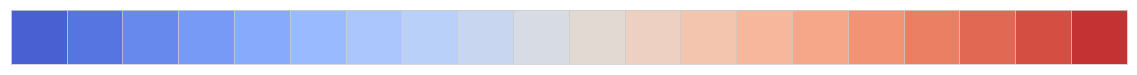

In [10]:
# показать палитру
sns.palplot(sns.color_palette('coolwarm', 20))

In [11]:
# от matplot: показать доступные стили и применить стиль
#plt.style.available
#plt.style.use('ggplot')

# Распределение величин <a class="anchor" id=Распределение_величин></a>

## displot <a class="anchor" id=displot></a>

Гистограма с приколами. Может учитывать разделение по многим признакам + зачем-то может становиться kde, ecdf.

https://seaborn.pydata.org/generated/seaborn.displot.html

<Figure size 1440x432 with 0 Axes>

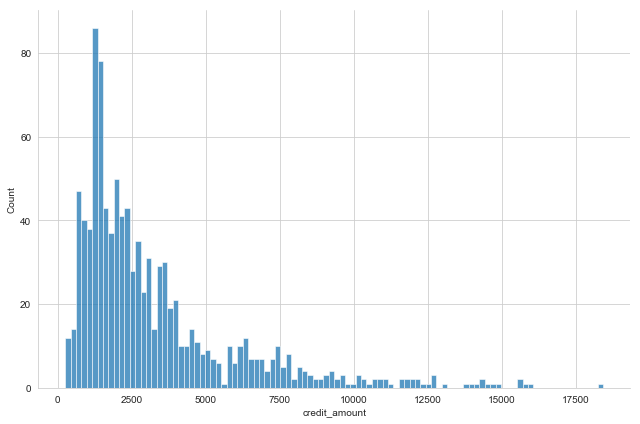

In [12]:
plt.figure(figsize=(20, 6))
sns.displot(x='credit_amount', data=data, bins=100, height=6, aspect=1.5);

<Figure size 1440x432 with 0 Axes>

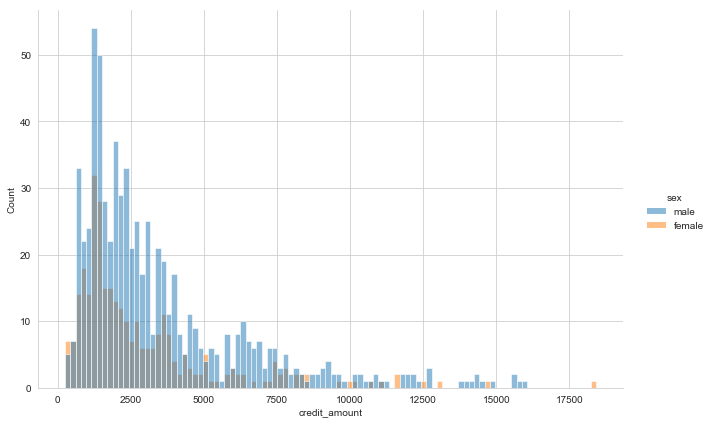

In [13]:
plt.figure(figsize=(20, 6))
sns.displot(x='credit_amount', data=data, bins=100, height=6, aspect=1.5, hue='sex');

<Figure size 1440x432 with 0 Axes>

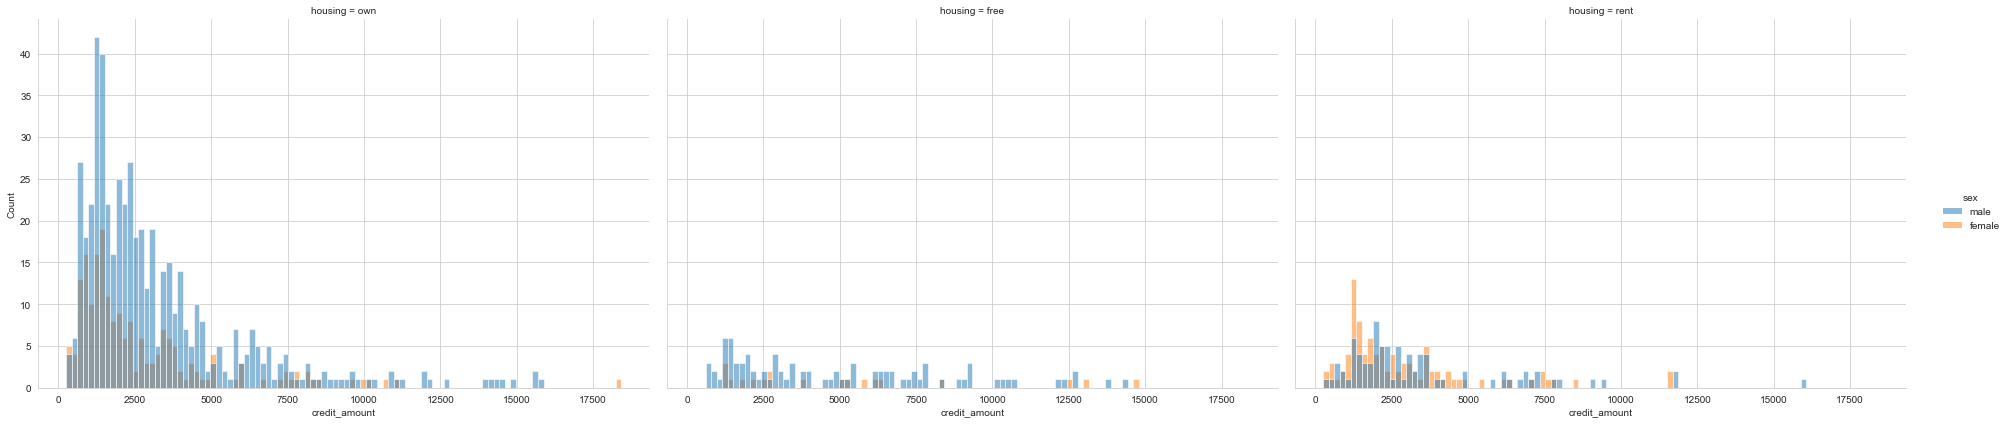

In [14]:
plt.figure(figsize=(20, 6))
sns.displot(x='credit_amount', data=data, bins=100, height=6, aspect=1.5, hue='sex', col='housing');

## kdeplot <a class="anchor" id=kdeplot></a>

Оценка плотности ядра (kernel density estimation, или kde). kde рисуется в виде линии и часто повторяет форму гистограмм, но дает больше информации о характере распределения. По факту -- сглаженная гистограмма.

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

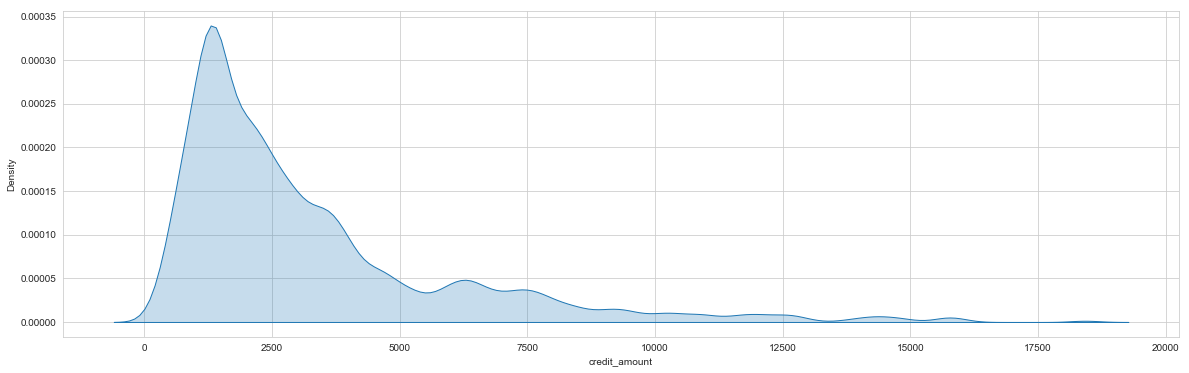

In [15]:
plt.figure(figsize=(20, 6))
sns.kdeplot(data['credit_amount'], shade=True, bw=0.1)
plt.show()

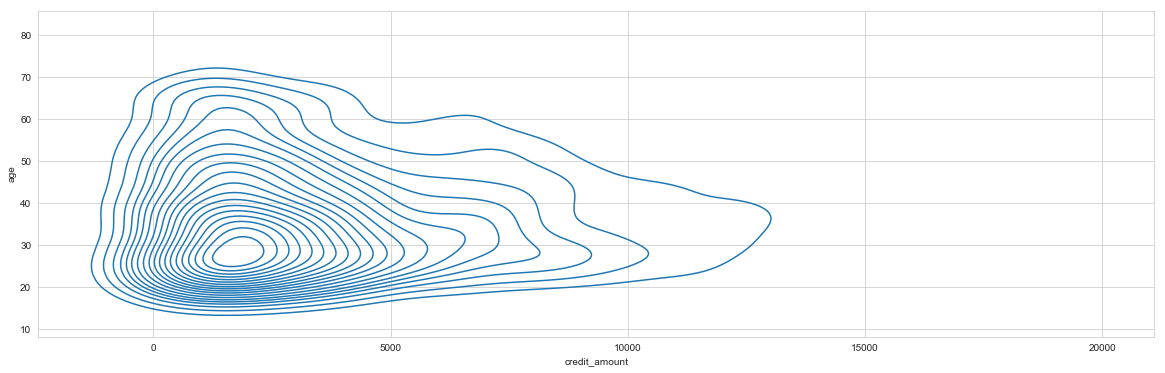

In [16]:
plt.figure(figsize=(20, 6))
sns.kdeplot(data['credit_amount'],
            data['age'],
            n_levels=20)
# plt.xlim(0, 200)
# plt.ylim(0, 5)
plt.show()

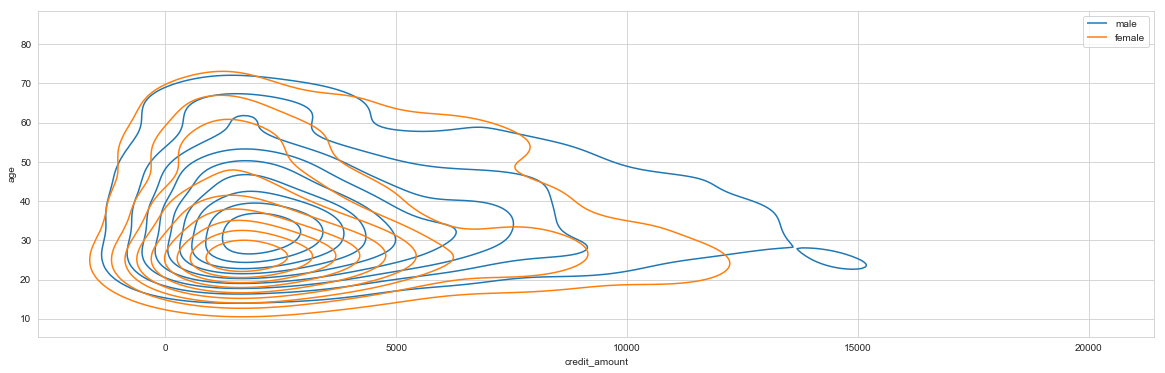

In [17]:
plt.figure(figsize=(20, 6))
data_male = data.query('sex == "male"')
data_female = data.query('sex == "female"')
sns.kdeplot(data_male['credit_amount'],
            data_male['age'],
            n_levels=10)
sns.kdeplot(data_female['credit_amount'],
            data_female['age'],
            n_levels=10)
plt.legend(['male', 'female'])
plt.show()

## histplot <a class="anchor" id=histplot></a>

Классическая гистограмма.

https://seaborn.pydata.org/generated/seaborn.histplot.html

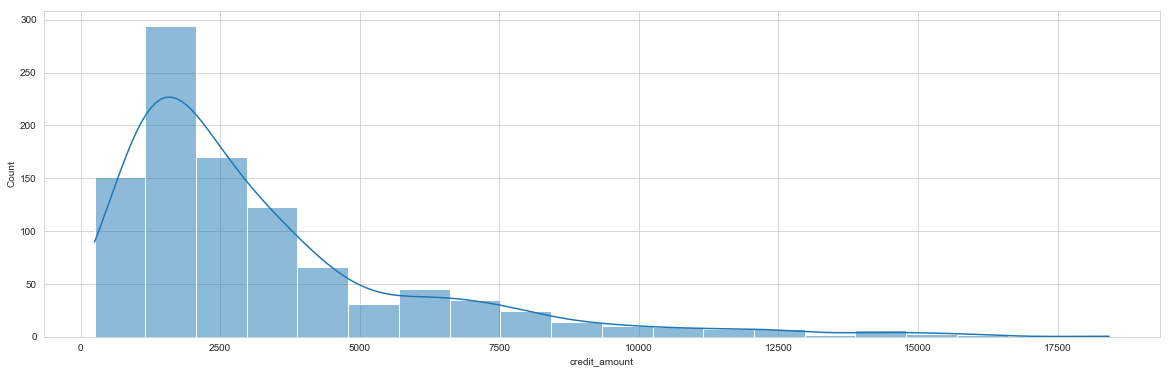

In [18]:
plt.figure(figsize=(20, 6))
sns.histplot(x='credit_amount', data=data,
             bins=20,
             kde=True,
             stat='count')
plt.show()

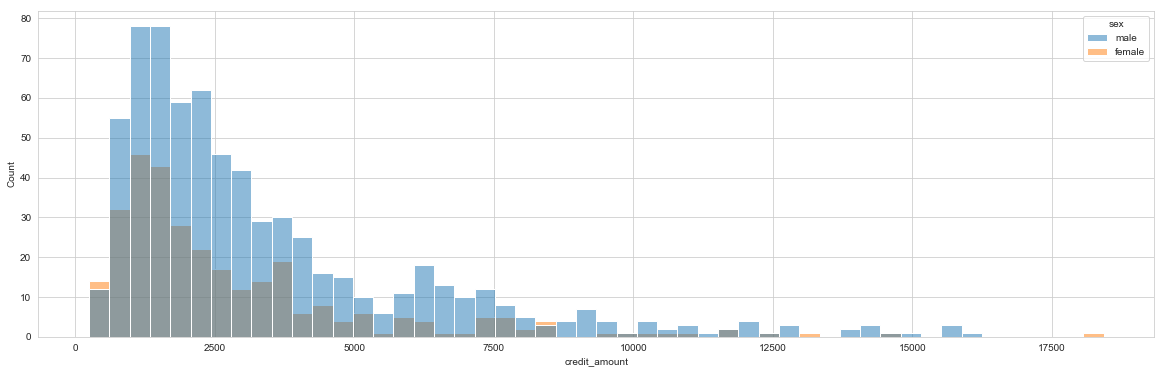

In [19]:
plt.figure(figsize=(20, 6))
sns.histplot(x='credit_amount', data=data,
             bins=50,
             kde=False,
             stat='count',
             hue='sex')
plt.show()

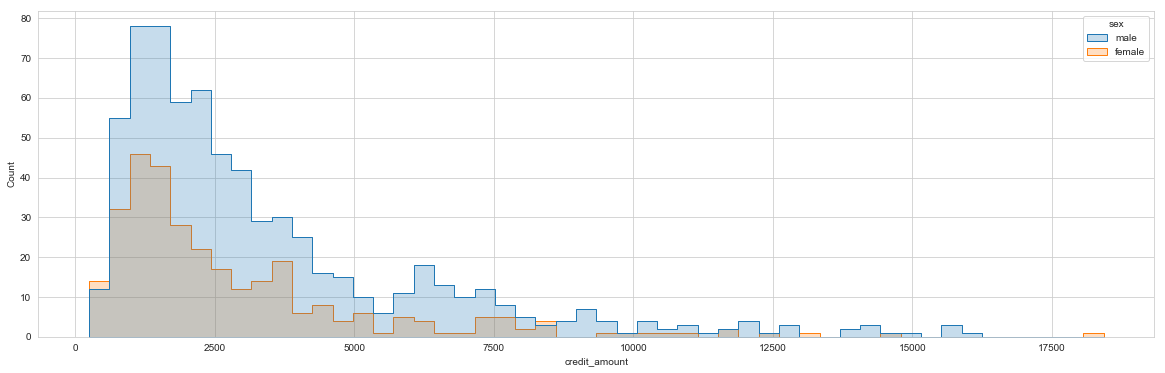

In [20]:
plt.figure(figsize=(20, 6))
sns.histplot(x='credit_amount', data=data,
             bins=50,
             kde=False,
             stat='count',
             hue='sex',
             element='step')
plt.show()

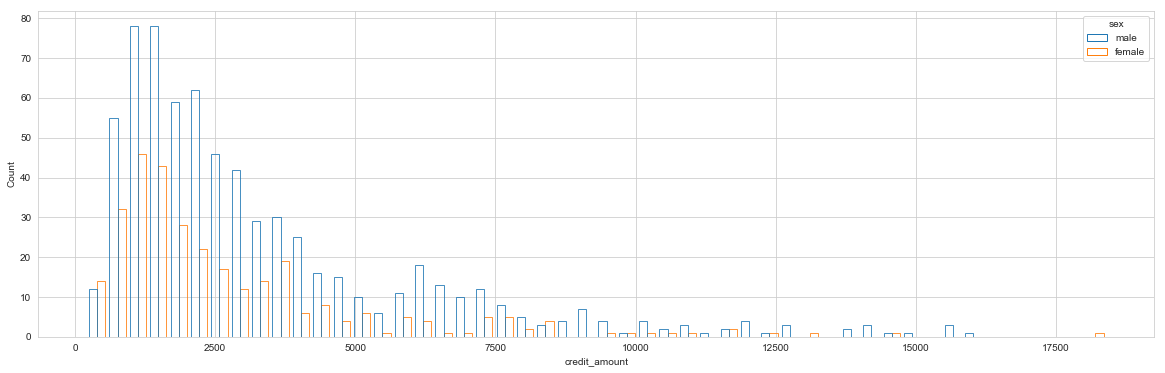

In [21]:
plt.figure(figsize=(20, 6))
sns.histplot(x='credit_amount', data=data,
             bins=50,
             kde=False,
             stat='count',
             hue='sex',
             multiple='dodge',
            shrink=0.8,
            fill=False)
plt.show()

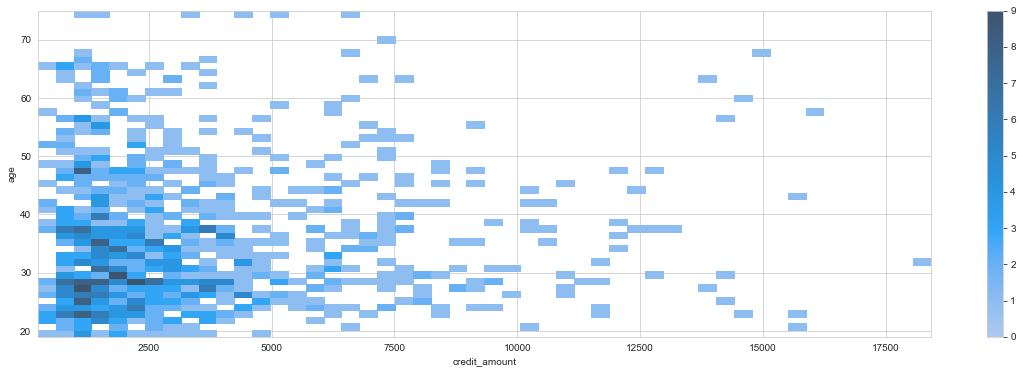

In [22]:
plt.figure(figsize=(20, 6))
sns.histplot(x='credit_amount', y='age', data=data,
             bins=50,
             kde=False,
             stat='count',
             cbar=True)
plt.show()

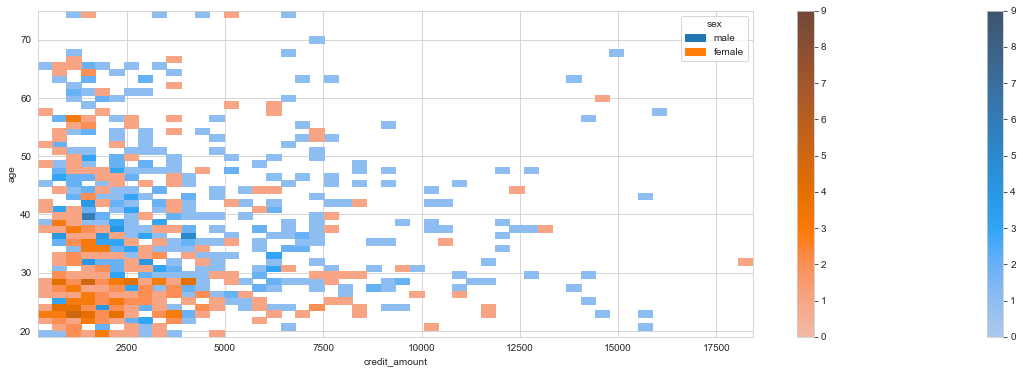

In [23]:
plt.figure(figsize=(20, 6))
sns.histplot(x='credit_amount', y='age', data=data,
             bins=50,
             kde=False,
             stat='count',
             cbar=True,
             hue='sex')
plt.show()

## ecdfplot <a class="anchor" id=ecdfplot></a>

ECDF представляет долю или количество наблюдений, попадающих ниже каждого уникального значения в наборе данных. Виден вклад кажого значения в общую накопленную сумму.

https://seaborn.pydata.org/generated/seaborn.ecdfplot.html

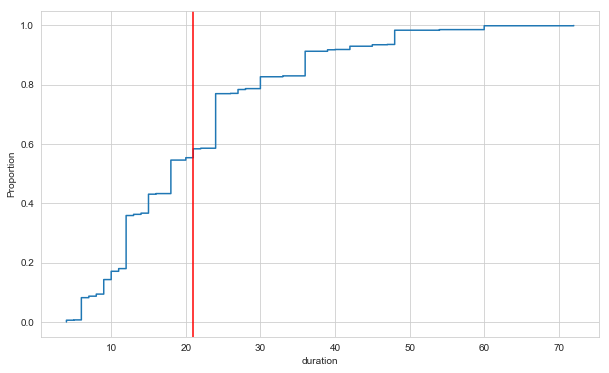

In [24]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(x='duration', data=data)
plt.axvline(data['duration'].mean(), c='red')
plt.show()

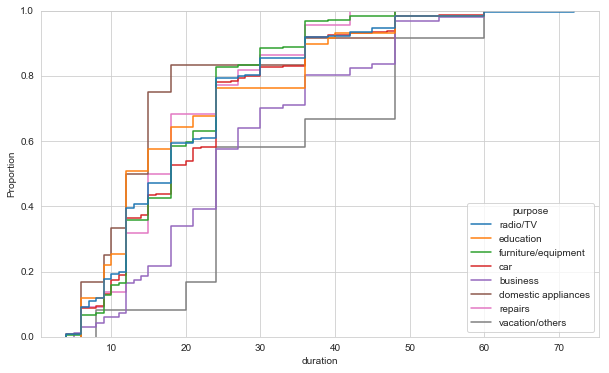

In [25]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(x='duration', data=data, hue='purpose')
plt.show()

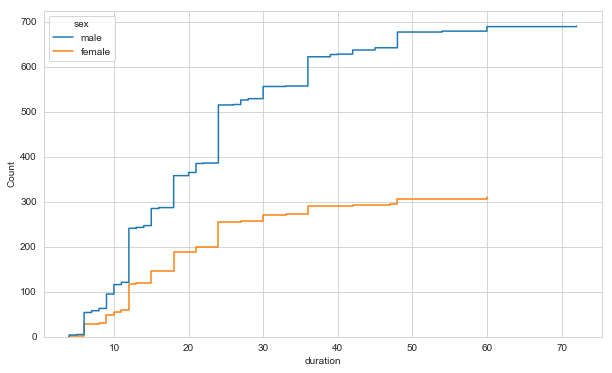

In [26]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(x='duration', data=data, hue='sex', stat='count')
plt.show()

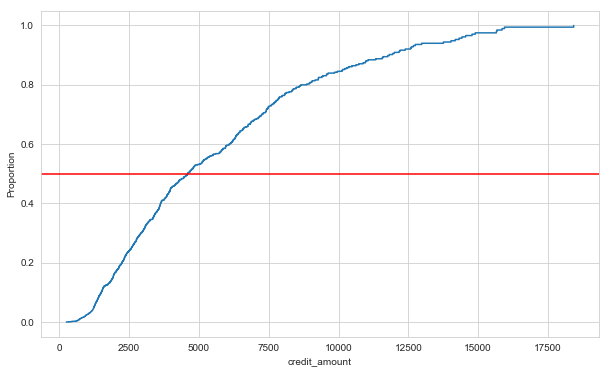

In [27]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(x='credit_amount', data=data, weights='credit_amount')
plt.axhline(0.5, c='red')
plt.show()

## boxplot <a class="anchor" id=boxplot></a>

Обычный ящик, но: можно делить на категории (через hue и 2 оси) и много вариантов кастомизации.

https://seaborn.pydata.org/generated/seaborn.boxplot.html

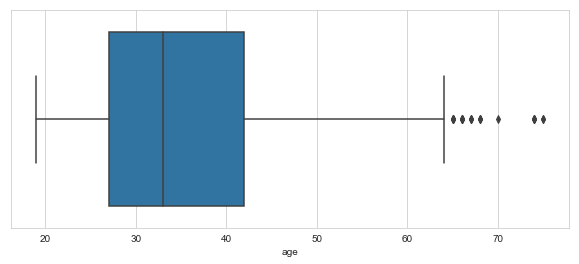

In [28]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='age', data=data)
plt.show()

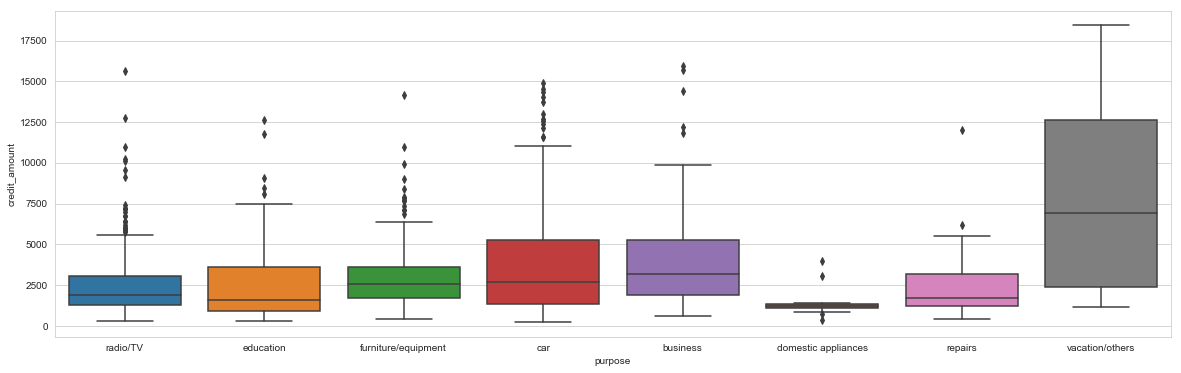

In [29]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='purpose', y='credit_amount', data=data)
plt.show()

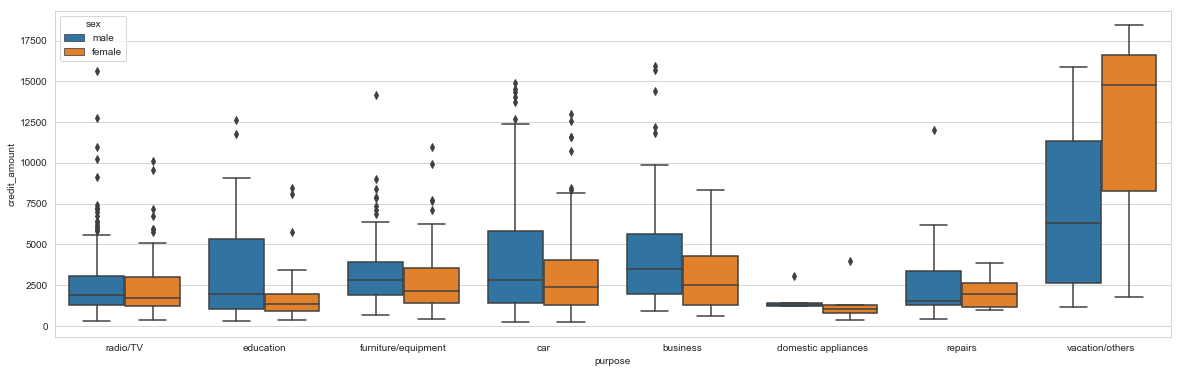

In [30]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='purpose', y='credit_amount', data=data, hue='sex')
plt.show()

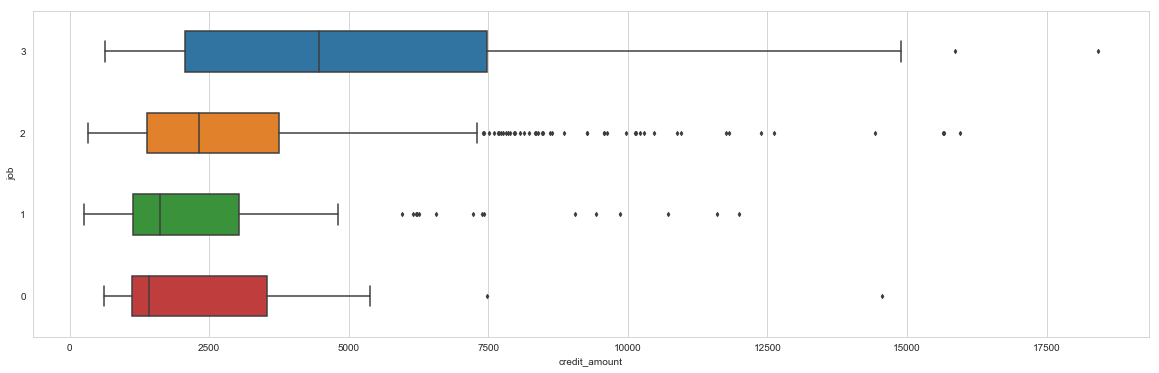

In [31]:
plt.figure(figsize=(20, 6))
sns.boxplot(y='job', x='credit_amount', data=data, orient='h', order=[3, 2, 1, 0], width=0.5, fliersize=3)
plt.show()

## boxenplot  <a class="anchor" id=boxenplot ></a>

Продвинутый вариант boxplot.

https://seaborn.pydata.org/generated/seaborn.boxenplot.html

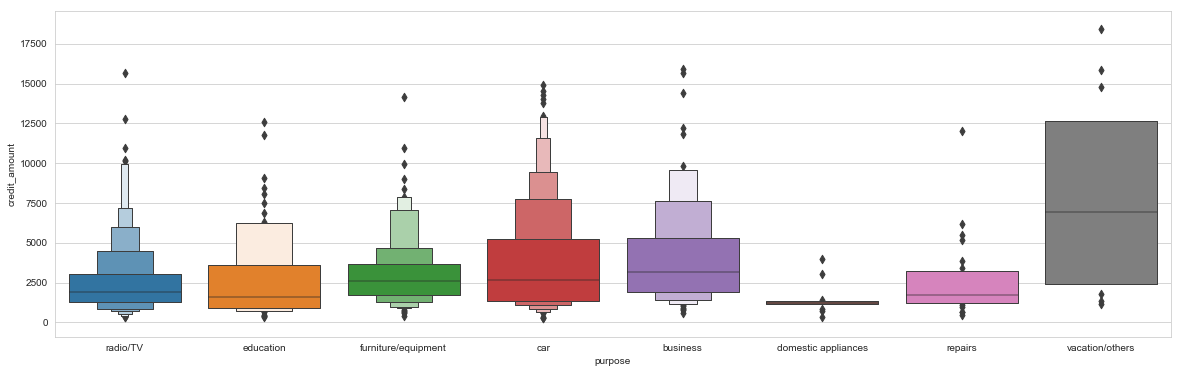

In [32]:
plt.figure(figsize=(20, 6))
sns.boxenplot(x='purpose', y='credit_amount', data=data)
plt.show()

## violinplot <a class="anchor" id=violinplot></a>

Гибрид ящика с усами и KDE.

https://seaborn.pydata.org/generated/seaborn.violinplot.html

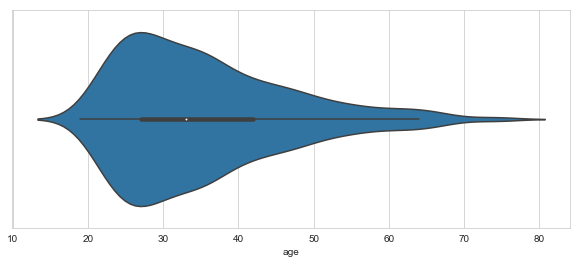

In [33]:
plt.figure(figsize=(10, 4))
sns.violinplot(x='age', data=data)
plt.show()

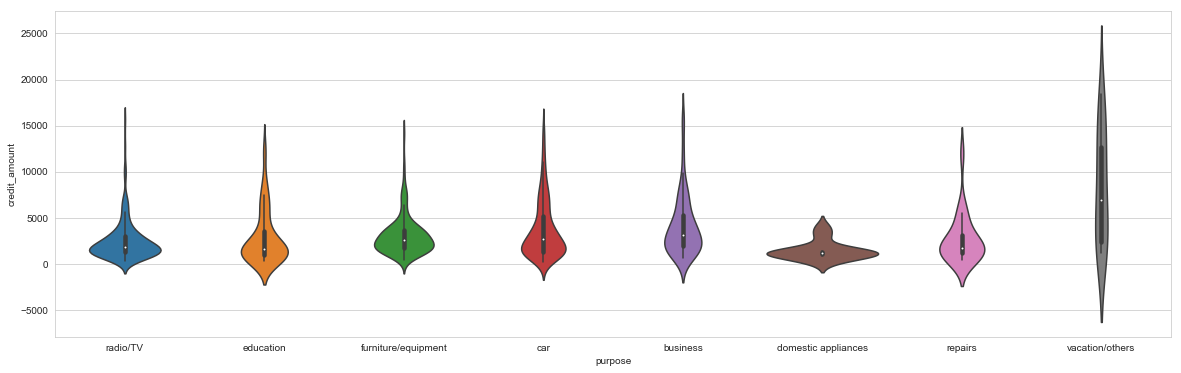

In [34]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='purpose', y='credit_amount', data=data)
plt.show()

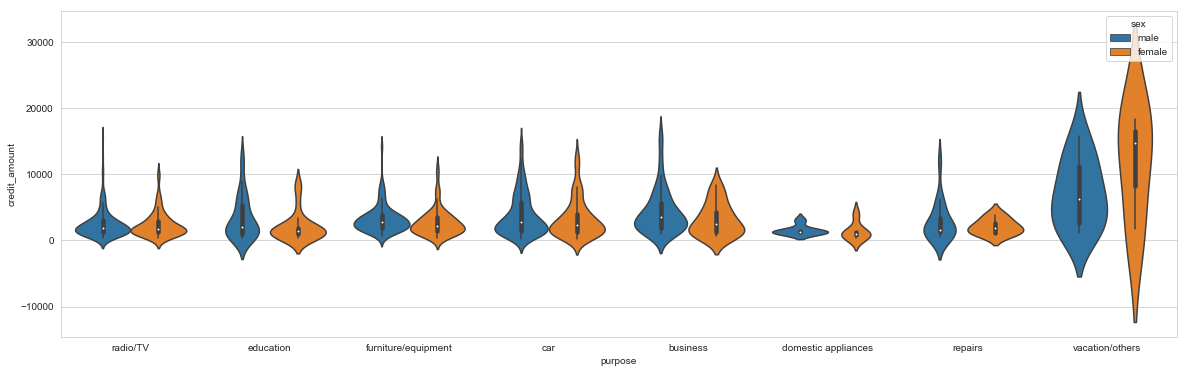

In [35]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='purpose', y='credit_amount', data=data, hue='sex')
plt.show()

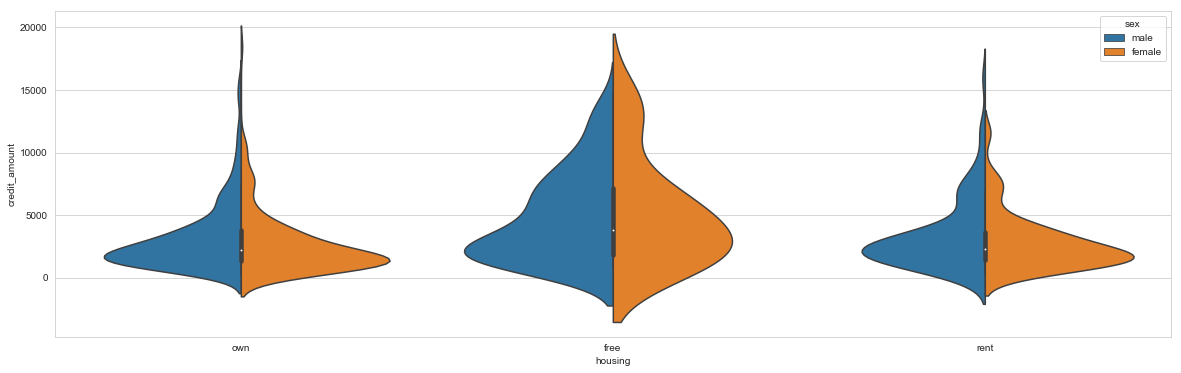

In [36]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='housing', y='credit_amount', data=data, hue='sex', split=True)
plt.show()

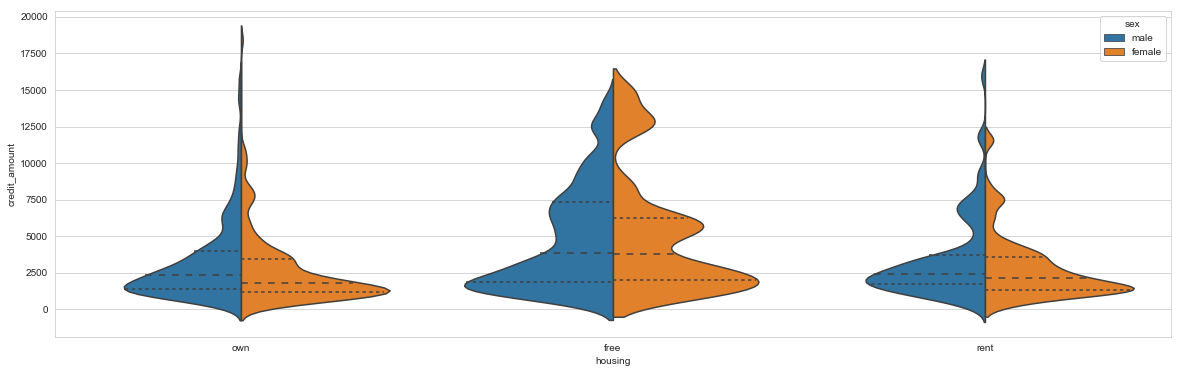

In [37]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='housing', y='credit_amount', data=data, hue='sex', split=True, inner='quartile', bw=0.2)
plt.show()

## swarmplot <a class="anchor" id=swarmplot></a>

То же назначение, что и у бокс-плота и скрипки. Может быть плохо на больших объёмах данных: много точек.

https://seaborn.pydata.org/generated/seaborn.swarmplot.html

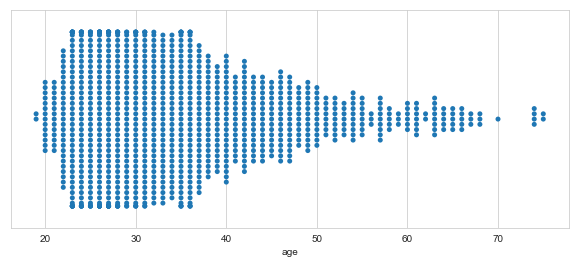

In [38]:
plt.figure(figsize=(10, 4))
sns.swarmplot(x='age', data=data)
plt.show()

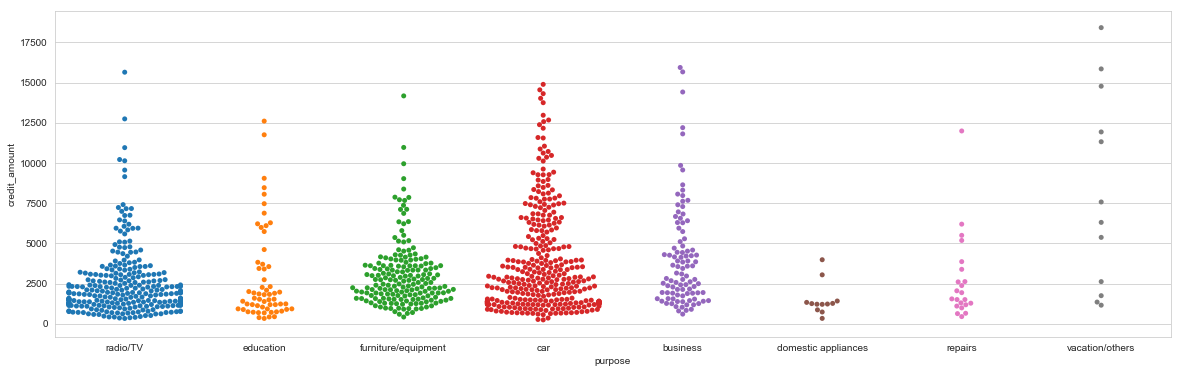

In [39]:
plt.figure(figsize=(20, 6))
sns.swarmplot(x='purpose', y='credit_amount', data=data)
plt.show()

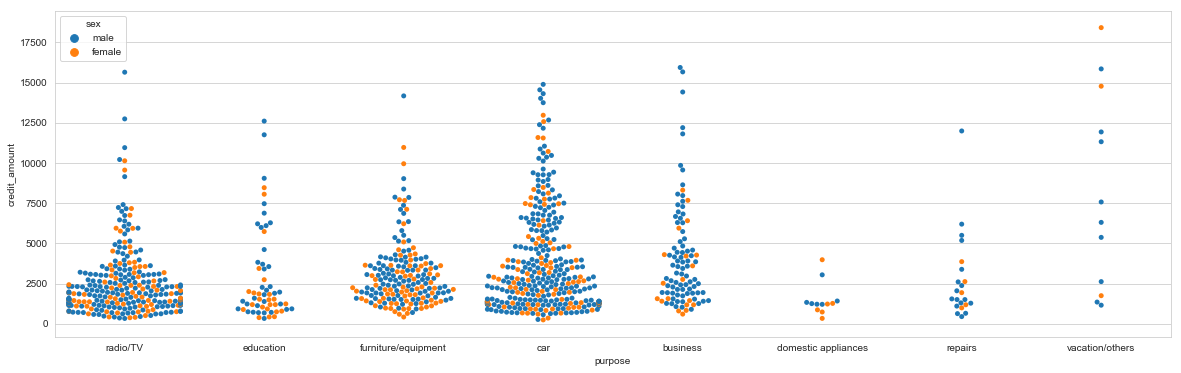

In [40]:
plt.figure(figsize=(20, 6))
sns.swarmplot(x='purpose', y='credit_amount', data=data, hue='sex')
plt.show()

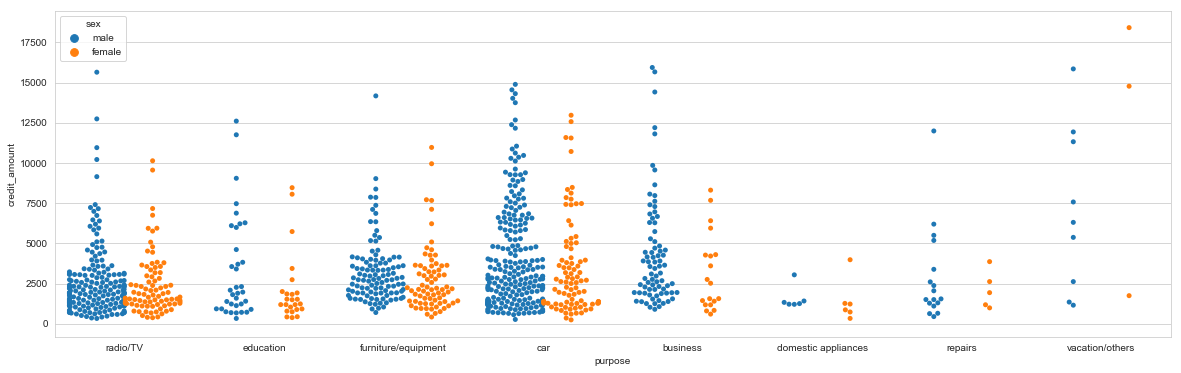

In [41]:
plt.figure(figsize=(20, 6))
sns.swarmplot(x='purpose', y='credit_amount', data=data, hue='sex', dodge=True)
plt.show()

## stripplot <a class="anchor" id=stripplot></a>

Похоже на swarm, но точки расположены случайным образом -- можно вместить больше данных.

https://seaborn.pydata.org/generated/seaborn.stripplot.html

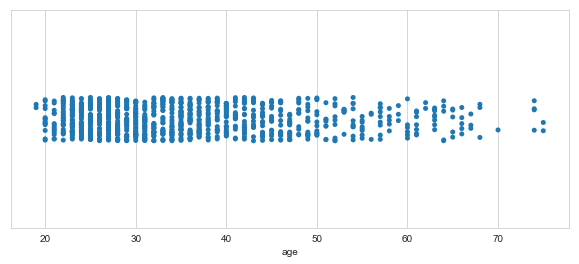

In [42]:
plt.figure(figsize=(10, 4))
sns.stripplot(x='age', data=data)
plt.show()

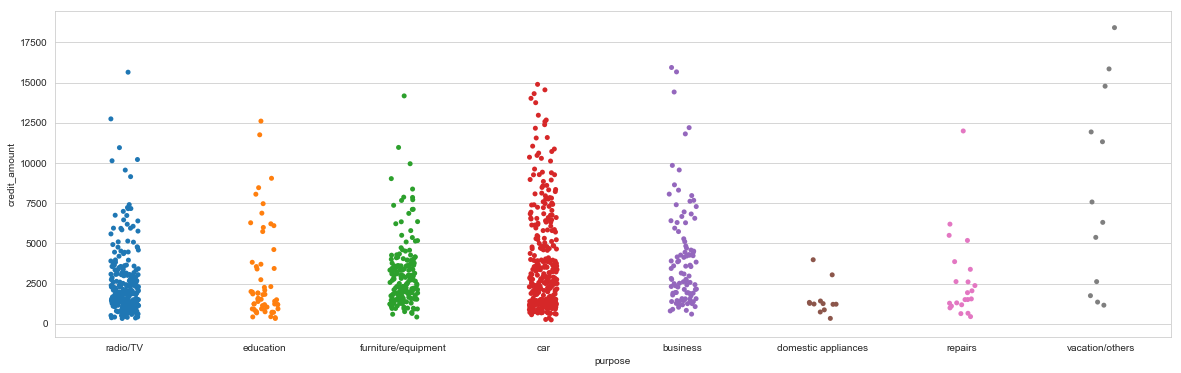

In [43]:
plt.figure(figsize=(20, 6))
sns.stripplot(x='purpose', y='credit_amount', data=data)
plt.show()

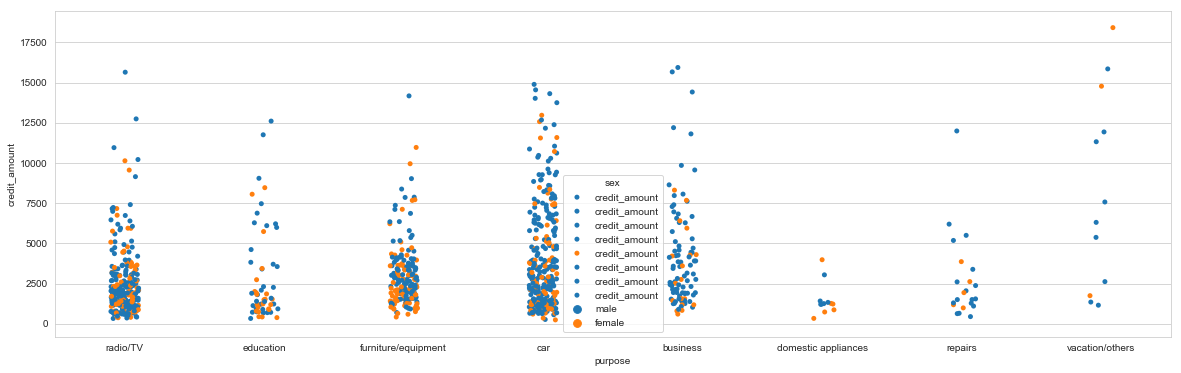

In [44]:
plt.figure(figsize=(20, 6))
sns.stripplot(x='purpose', y='credit_amount', data=data, hue='sex')
plt.show()

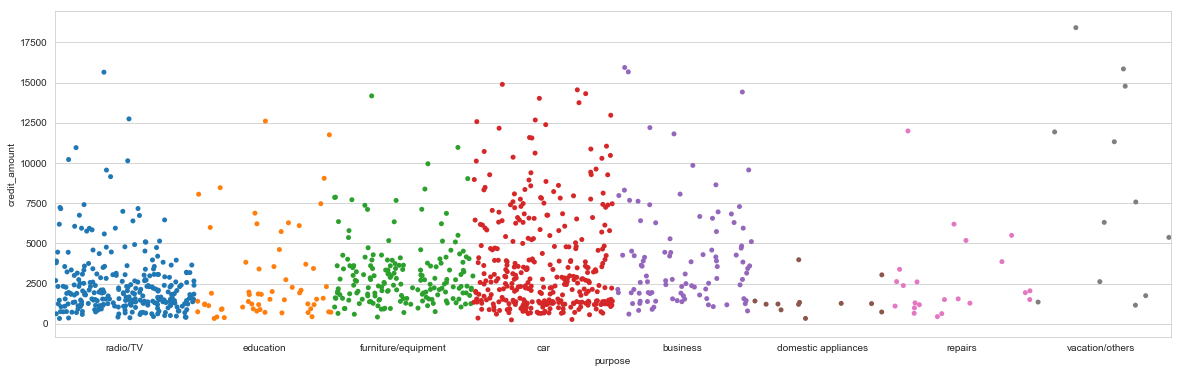

In [45]:
plt.figure(figsize=(20, 6))
sns.stripplot(x='purpose', y='credit_amount', data=data, jitter=0.5)
plt.show()

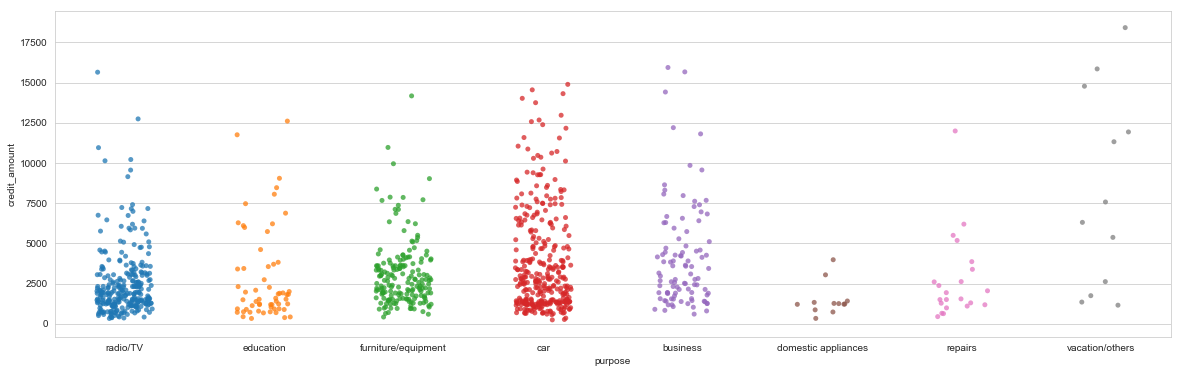

In [46]:
plt.figure(figsize=(20, 6))
sns.stripplot(x='purpose', y='credit_amount', data=data, jitter=0.2, alpha=0.75)
plt.show()

## barplot <a class="anchor" id=barplot></a>

Бары с особенностями: можно сразу указать, что показывать (сумму, максимум, СКО или что-то ещё).

https://seaborn.pydata.org/generated/seaborn.barplot.html

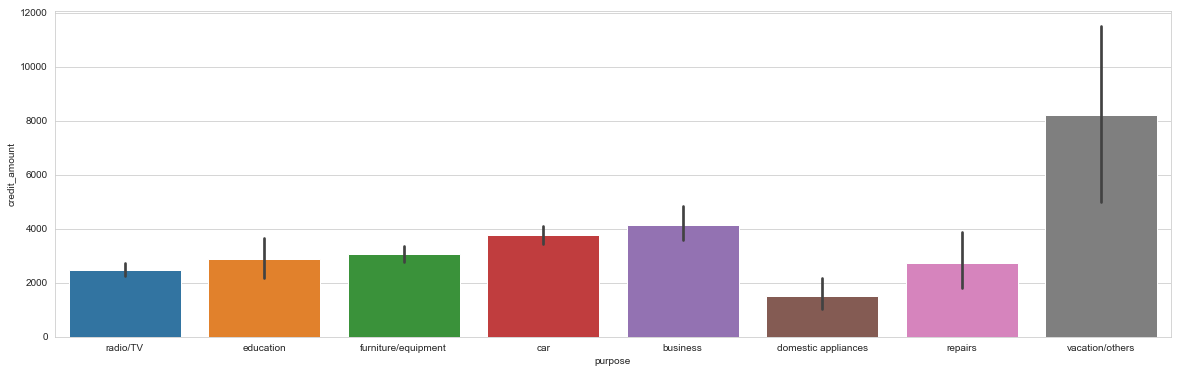

In [47]:
plt.figure(figsize=(20, 6))
sns.barplot(x='purpose', y='credit_amount', data=data)
plt.show()

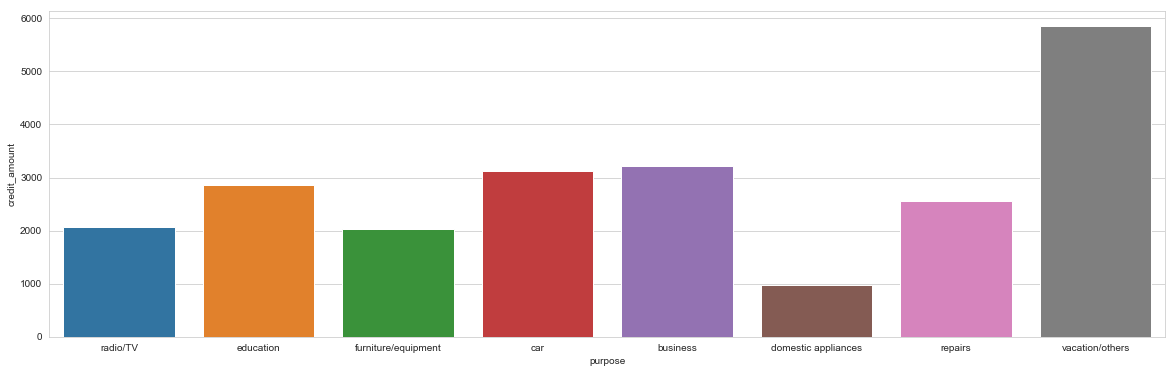

In [48]:
plt.figure(figsize=(20, 6))
sns.barplot(x='purpose', y='credit_amount', data=data, ci=None, estimator=np.std)
plt.show()

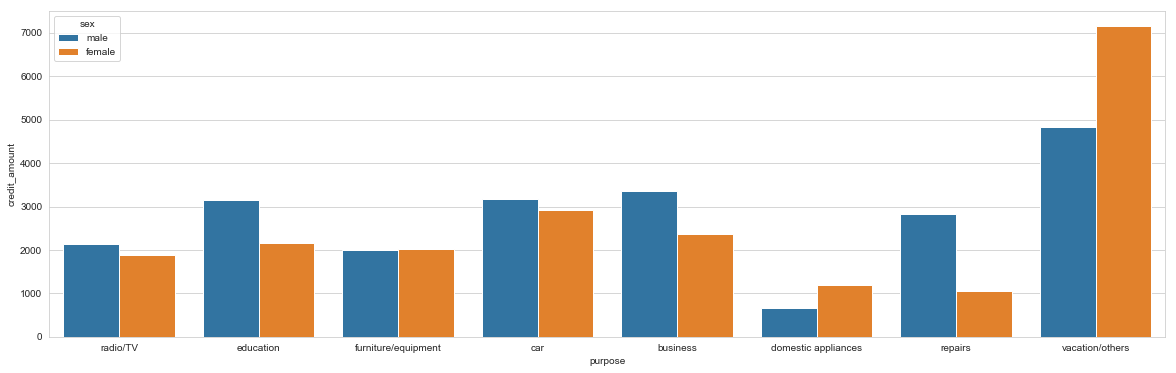

In [49]:
plt.figure(figsize=(20, 6))
sns.barplot(x='purpose', y='credit_amount', data=data, ci=None, estimator=np.std, hue='sex')
plt.show()

## countplot <a class="anchor" id=countplot></a>

Бары на минималках: минимум параметров, считает только количество.

https://seaborn.pydata.org/generated/seaborn.countplot.html

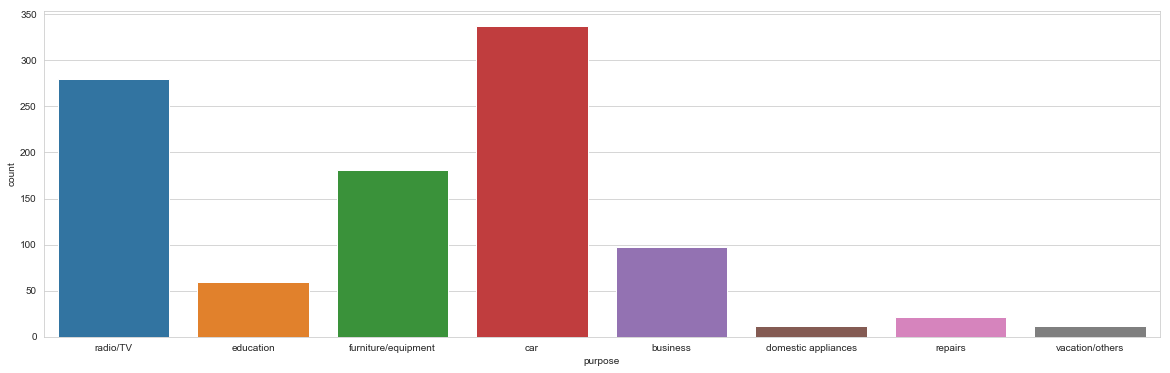

In [50]:
plt.figure(figsize=(20, 6))
sns.countplot(x='purpose', data=data)
plt.show()

In [51]:
data['purpose'].value_counts().index

Index(['car', 'radio/TV', 'furniture/equipment', 'business', 'education',
       'repairs', 'domestic appliances', 'vacation/others'],
      dtype='object')

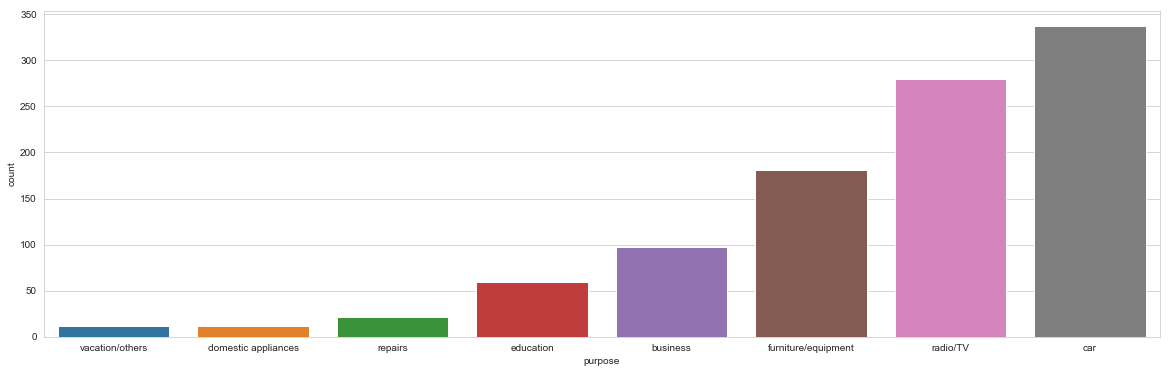

In [52]:
plt.figure(figsize=(20, 6))
sns.countplot(x='purpose', data=data,order=data['purpose'].value_counts().index[::-1])
plt.show()

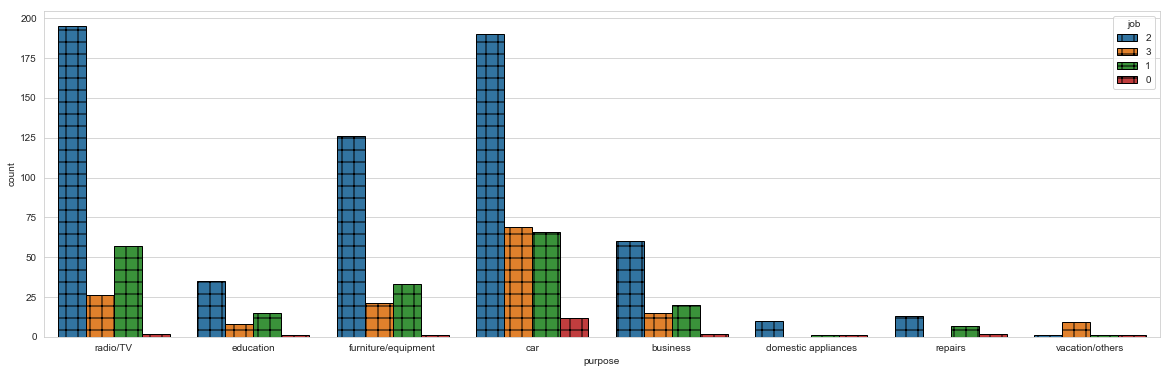

In [53]:
plt.figure(figsize=(20, 6))
sns.countplot(x='purpose', data=data, hue='job', hue_order=[2, 3, 1, 0], hatch='+', ec='black')
plt.show()

## pairplot <a class="anchor" id=pairplot></a>

Связи всех со всеми, hist для самой величины + scatter  для её связей с иными величинами. Только для numeric, bool. Категории можно вынести в hue.

https://seaborn.pydata.org/generated/seaborn.pairplot.html

<Figure size 1440x432 with 0 Axes>

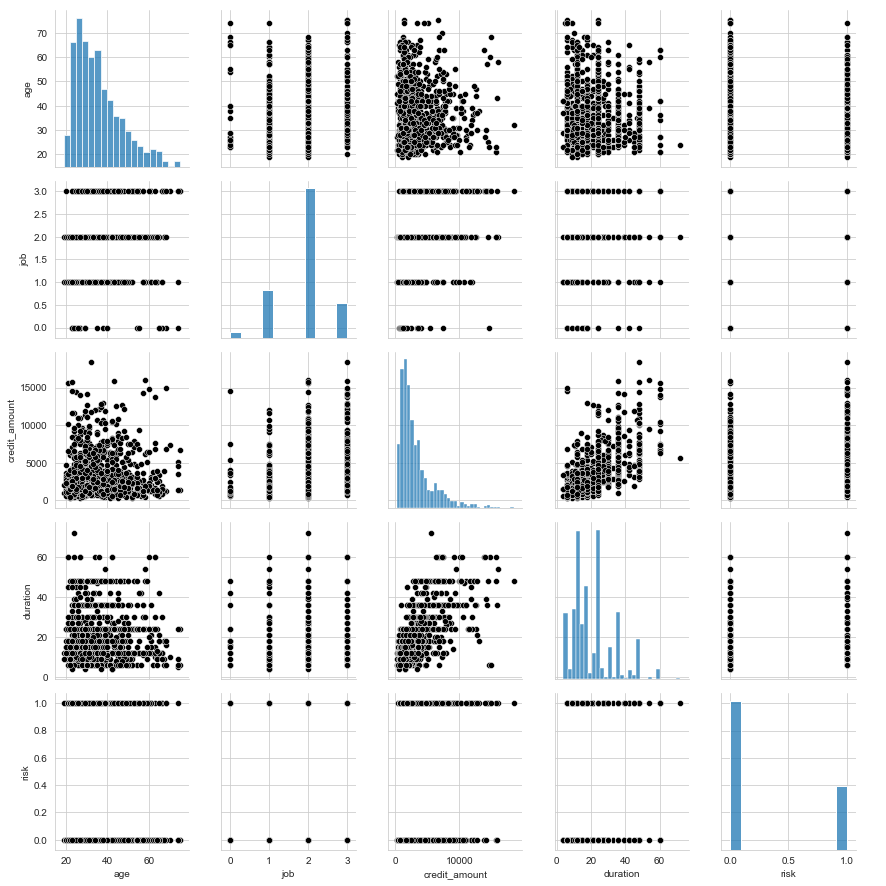

In [54]:
plt.figure(figsize=(20, 6))
sns.pairplot(data=data, plot_kws={'color':'black'})
plt.show()

<Figure size 1440x432 with 0 Axes>

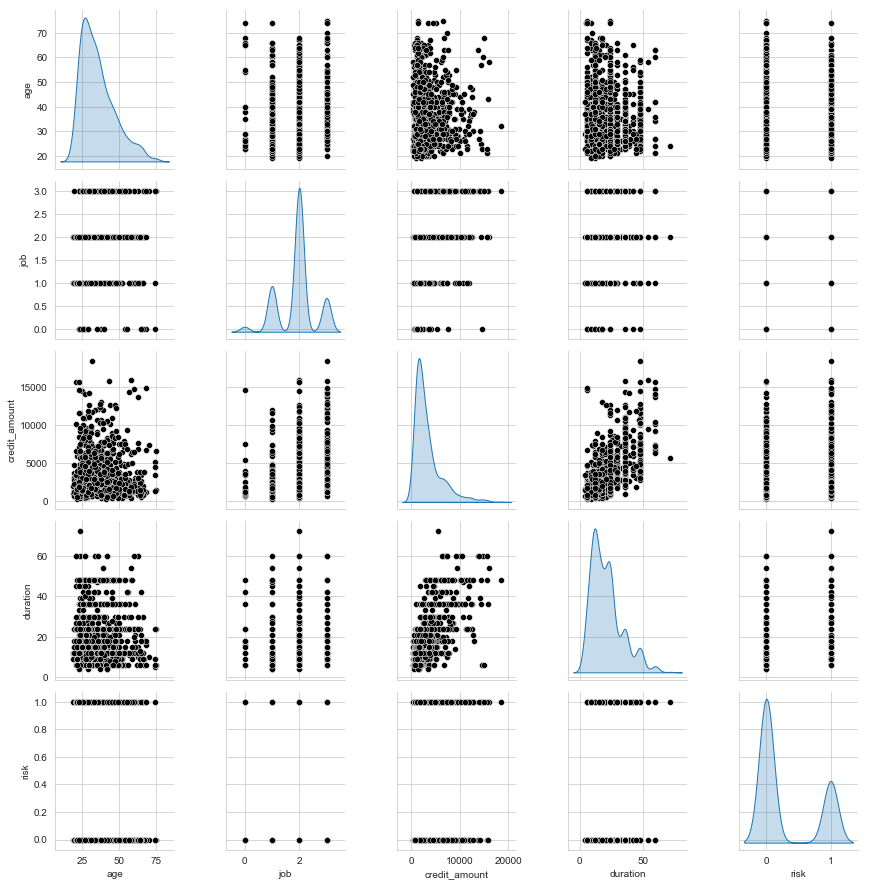

In [55]:
plt.figure(figsize=(20, 6))
sns.pairplot(data=data, plot_kws={'color':'black'}, diag_kind='kde')
plt.show()

<Figure size 1440x432 with 0 Axes>

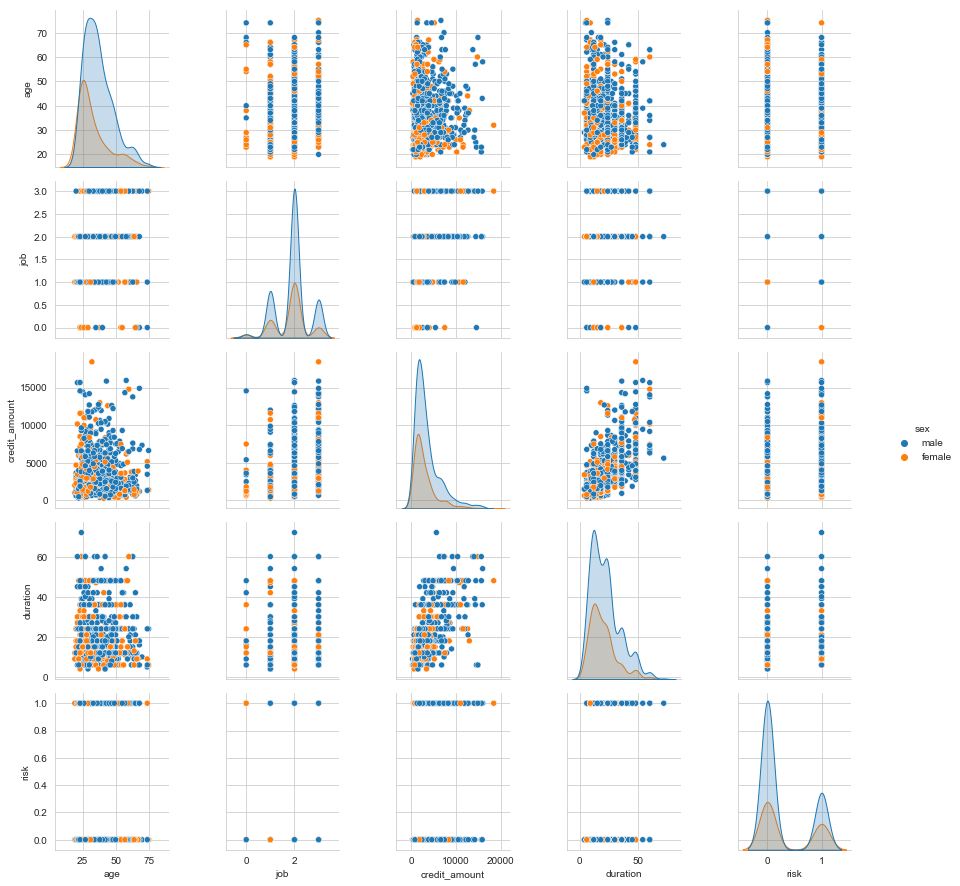

In [56]:
plt.figure(figsize=(20, 6))
sns.pairplot(data=data, diag_kind='kde', hue='sex')
plt.show()

<Figure size 1440x432 with 0 Axes>

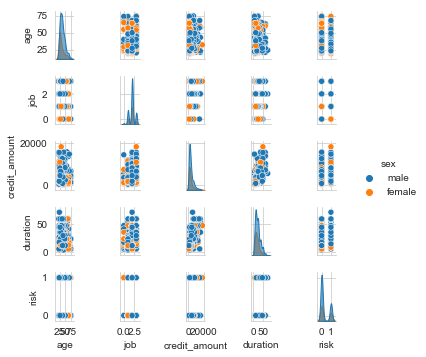

In [57]:
plt.figure(figsize=(20, 6))
sns.pairplot(data=data, diag_kind='kde', hue='sex', height=1, aspect=1, diag_kws={'color': 'gray', 'alpha': 0.6})
plt.show()

## jointplot <a class="anchor" id=jointplot></a>

Для 2-ух величин: распределение каждой величины + связь значений. Гибрид hist, scatter.

https://seaborn.pydata.org/generated/seaborn.jointplot.html

<Figure size 1440x432 with 0 Axes>

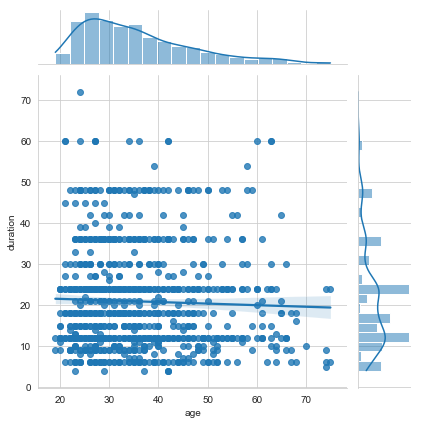

In [58]:
plt.figure(figsize=(20, 6))
sns.jointplot(x='age', y='duration', data=data, kind='reg')
plt.show()

<Figure size 1440x432 with 0 Axes>

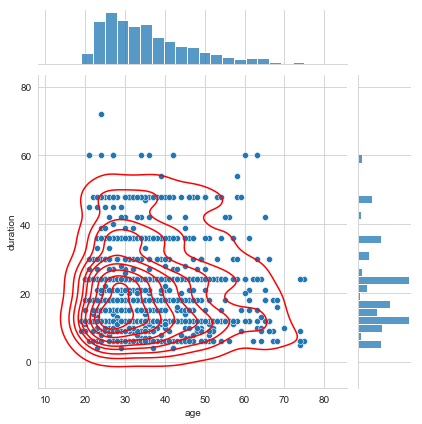

In [59]:
plt.figure(figsize=(20, 6))
first = sns.jointplot(x='age', y='duration', data=data)
first.plot_joint(sns.kdeplot, color='red', levels=10);
plt.show()

<Figure size 1440x432 with 0 Axes>

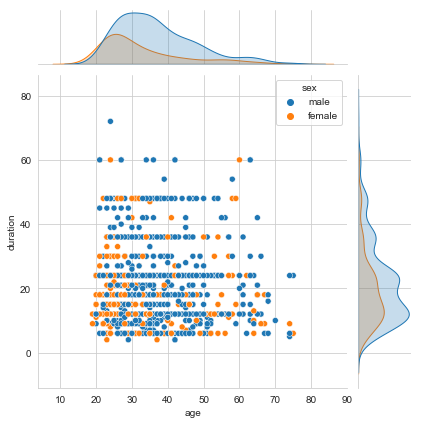

In [60]:
plt.figure(figsize=(20, 6))
sns.jointplot(x='age', y='duration', data=data, hue='sex')
plt.show()

## rugplot <a class="anchor" id=rugplot></a>

Распределение с помощью тиков. Полезен как дополнение к hist и пр.

https://seaborn.pydata.org/generated/seaborn.rugplot.html

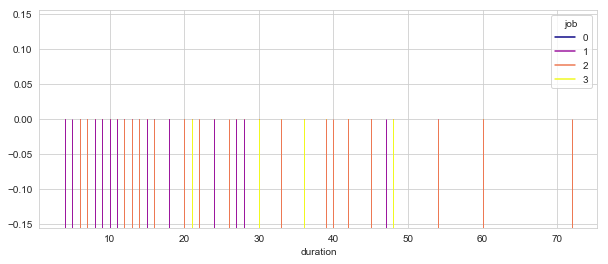

In [61]:
plt.figure(figsize=(10, 4))
sns.rugplot(x='duration', data=data, height=0.5, hue='job', palette='plasma')
plt.show()

# Связь величин <a class="anchor" id=Связь_величин></a>

## scatterplot <a class="anchor" id=scatterplot></a>

Взаимное распределение величин. Можно определить общий тренд.

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

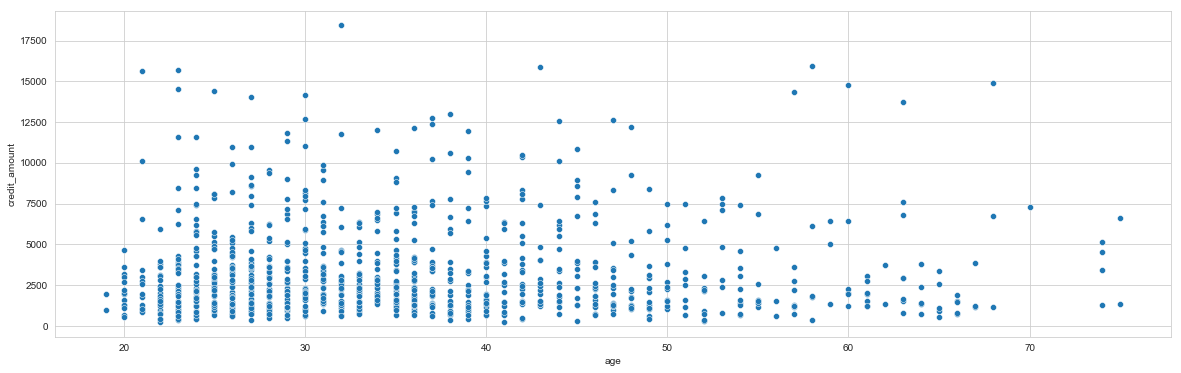

In [62]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='age', y='credit_amount', data=data)
plt.show()

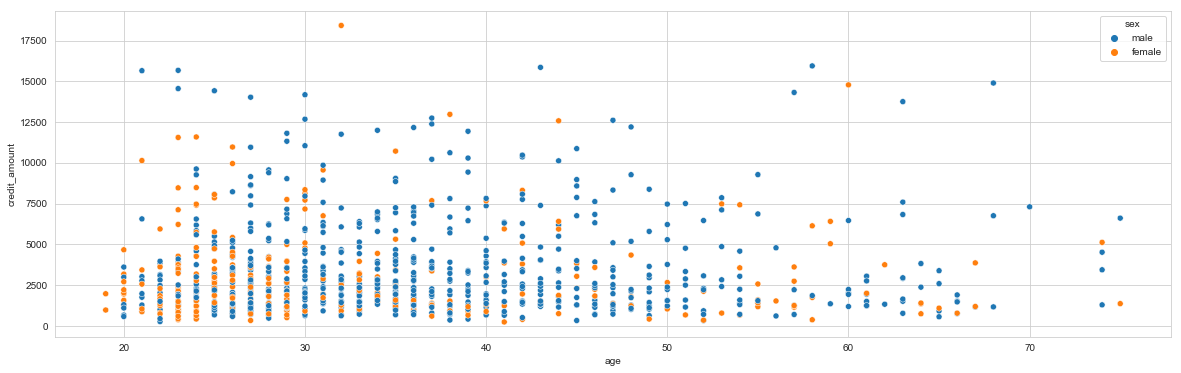

In [63]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='age', y='credit_amount', data=data, hue='sex')
plt.show()

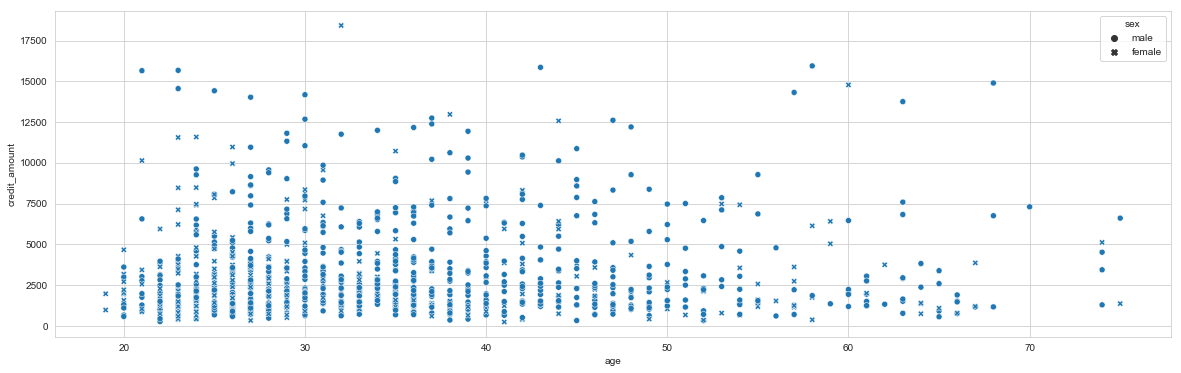

In [64]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='age', y='credit_amount', data=data, style='sex')
plt.show()

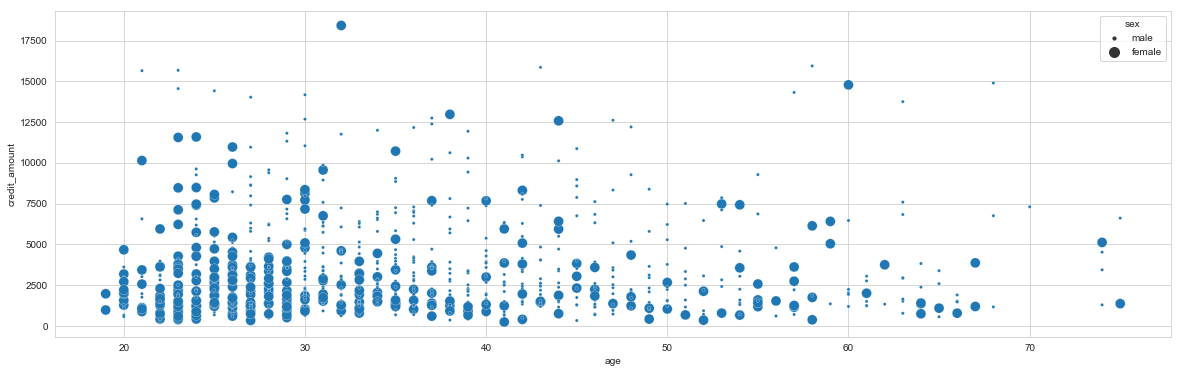

In [65]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='age', y='credit_amount', data=data, size='sex', sizes=[10, 100])
plt.show()

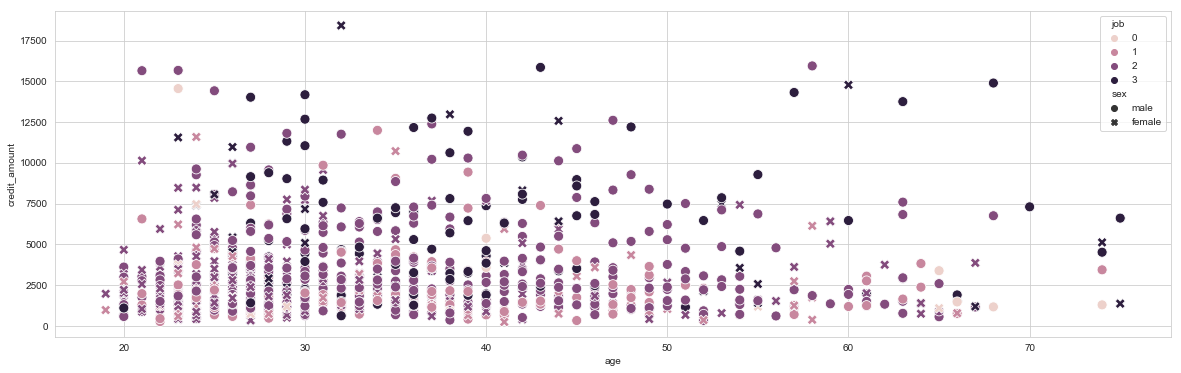

In [66]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='age', y='credit_amount', data=data, hue='job', style='sex', s=100)
plt.show()

## regplot <a class="anchor" id=regplot></a>

Регрессия: линейная и полиномиальная, можно bootstrap, устойчивость к выбросам и пр.

https://seaborn.pydata.org/generated/seaborn.regplot.html

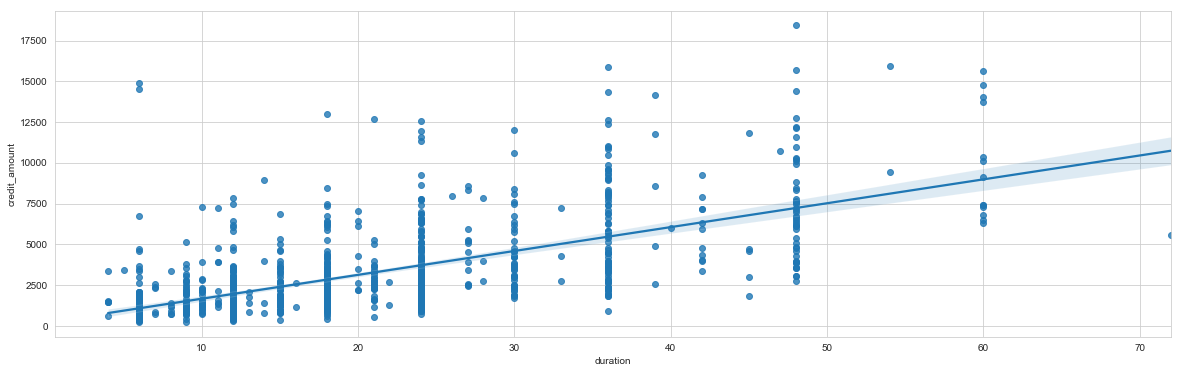

In [67]:
plt.figure(figsize=(20, 6))
sns.regplot(x='duration', y='credit_amount', data=data)
plt.show()

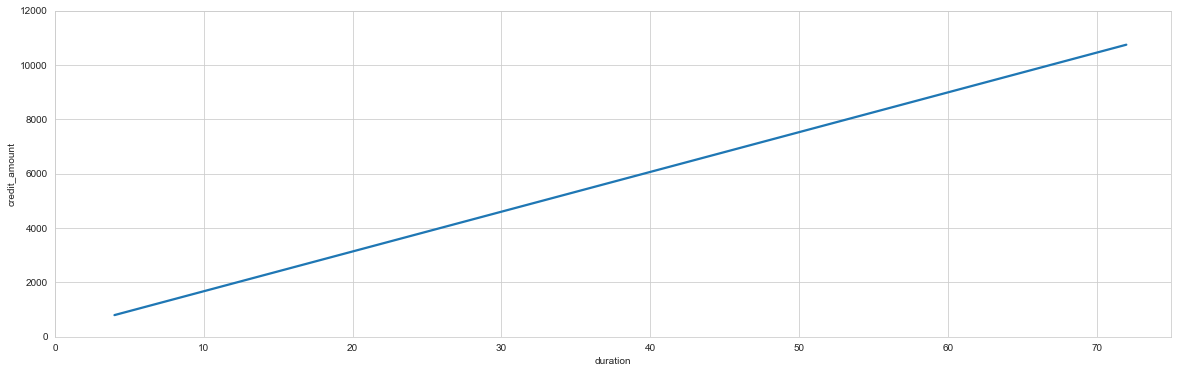

In [68]:
plt.figure(figsize=(20, 6))
plt.xlim(0, 75)
plt.ylim(0, 12000)
sns.regplot(x='duration', y='credit_amount', data=data, scatter=False, ci=None)
plt.show()

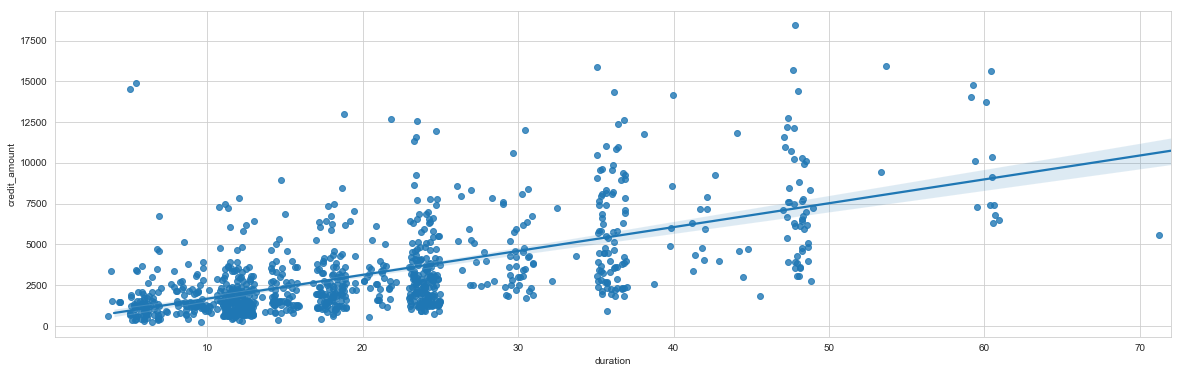

In [69]:
plt.figure(figsize=(20, 6))
sns.regplot(x='duration', y='credit_amount', data=data, x_jitter=1)
plt.show()

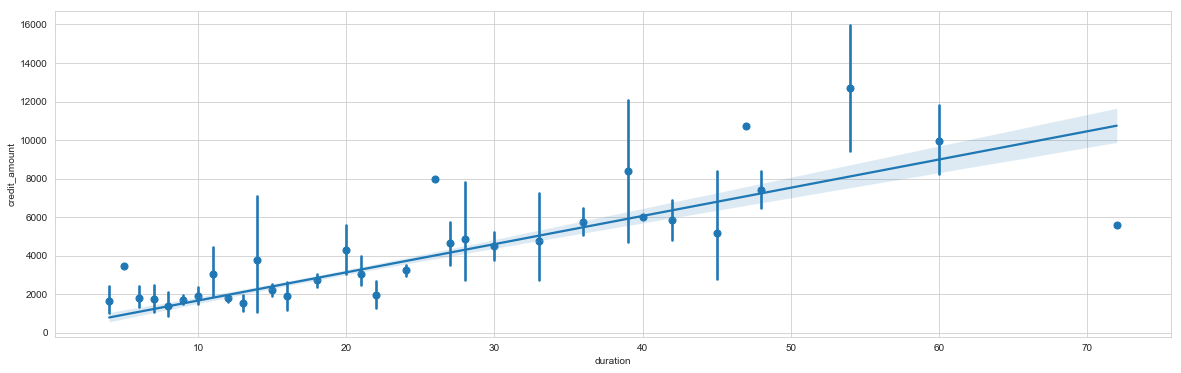

In [70]:
plt.figure(figsize=(20, 6))
sns.regplot(x='duration', y='credit_amount', data=data, x_estimator=np.mean)
plt.show()

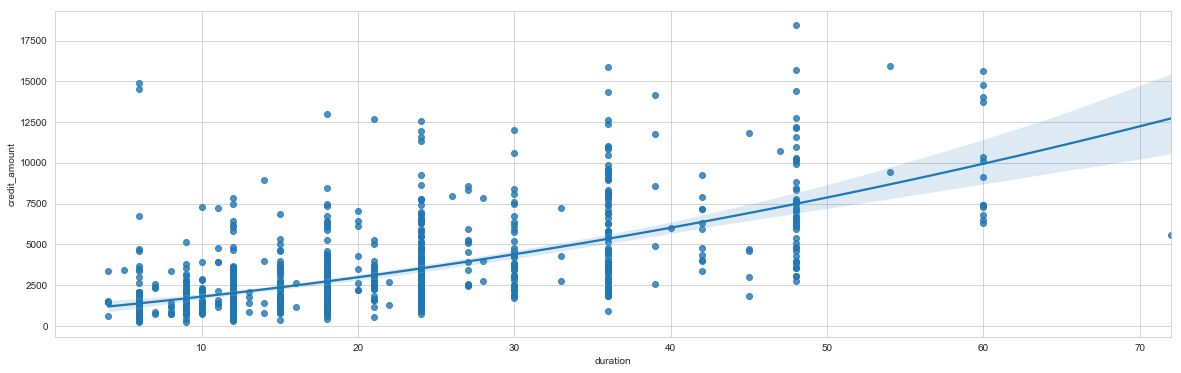

In [71]:
plt.figure(figsize=(20, 6))
sns.regplot(x='duration', y='credit_amount', data=data, order=2)
plt.show()

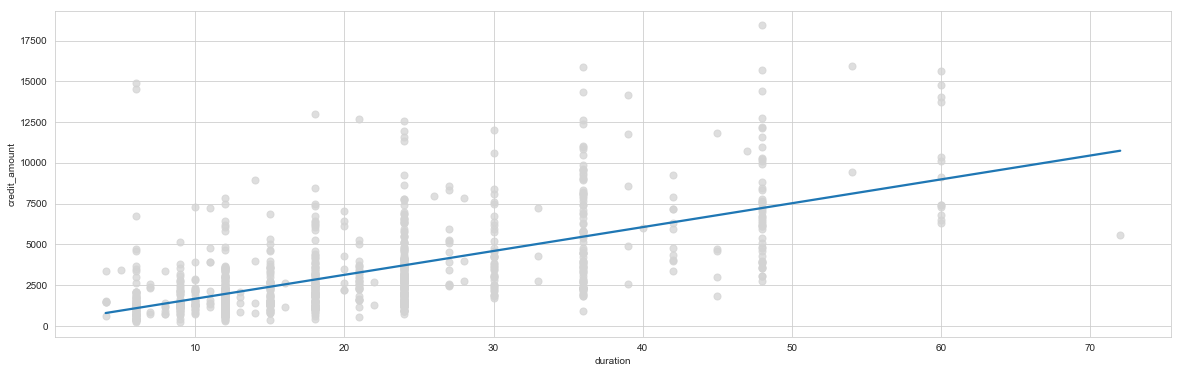

In [72]:
plt.figure(figsize=(20, 6))
sns.regplot(x='duration', y='credit_amount', data=data, ci=None, scatter_kws={'s': 50, 'alpha': 0.75, 'color': 'lightgray'})
plt.show()

## heatmap <a class="anchor" id=heatmap></a>

Раскрасить числа.

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [73]:
pivot_1 = data.pivot_table(index=['purpose'],
                           columns=['housing'],
                           values=['duration'],
                           aggfunc={'duration': 'mean'},
                           fill_value=0)
pivot_1.columns = ['_'.join(col).strip() for col in pivot_1.columns.values]
pivot_1

duration_free  duration_own  duration_rent
purpose                                                        
business                 36.600000     24.828947      33.937500
car                      28.363636     19.611872      18.396825
domestic appliances       0.000000     17.800000      12.000000
education                29.266667     16.558824      15.900000
furniture/equipment      22.636364     19.934426      16.895833
radio/TV                 21.066667     20.224670      18.578947
repairs                  18.000000     19.058824      21.000000
vacation/others          41.000000     28.000000       0.000000

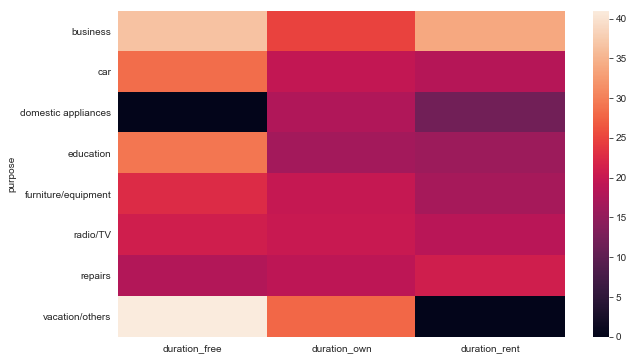

In [74]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_1)
plt.show()

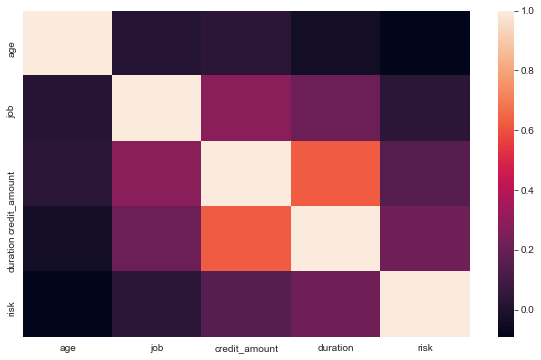

In [75]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=data.corr())
plt.show()

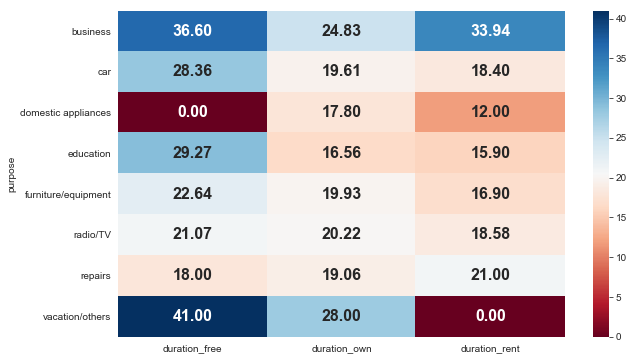

In [76]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_1, cmap='RdBu', annot=True, fmt=".2f",
            annot_kws={'fontsize': 16,
                       'fontweight': 'bold'})
plt.show()

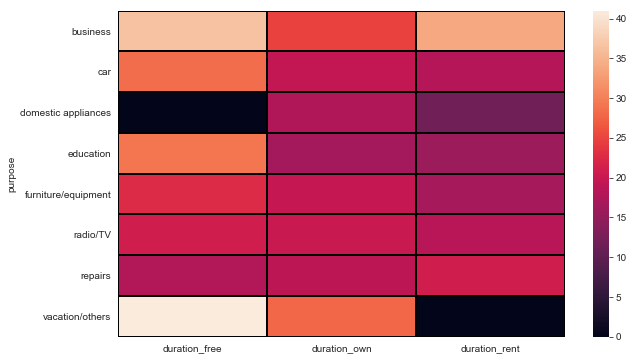

In [77]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_1, linewidth=1, linecolor='black')
plt.show()

## clustermap <a class="anchor" id=clustermap></a>

Heatmap с кластеризацией. Самое важное: как разбить на кластеры. Использует scipy для этого.

https://seaborn.pydata.org/generated/seaborn.clustermap.html

<Figure size 288x288 with 0 Axes>

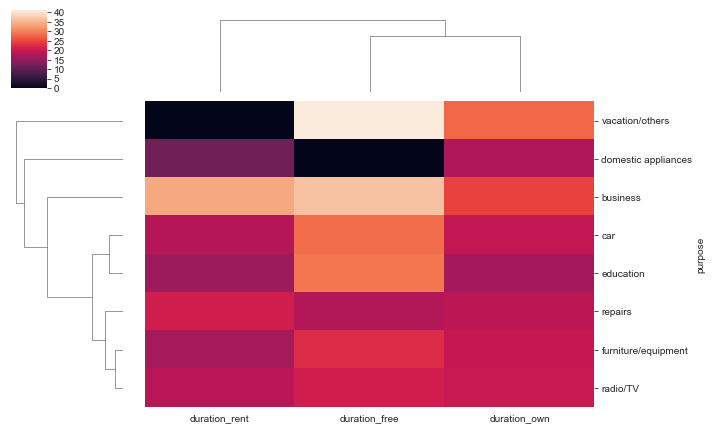

In [78]:
plt.figure(figsize=(4, 4))
sns.clustermap(data=pivot_1, figsize=(10, 6))
plt.show()

In [79]:
data_1 = data[['age', 'duration', 'credit_amount']].copy()

<Figure size 288x288 with 0 Axes>

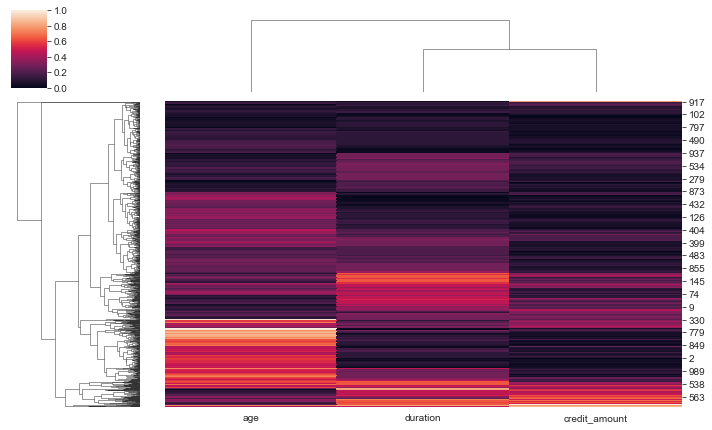

In [80]:
plt.figure(figsize=(4, 4))
sns.clustermap(data=data_1, figsize=(10, 6), standard_scale=1)
plt.show()

In [81]:
data['job'].unique()

array([2, 1, 3, 0], dtype=int64)

In [82]:
job_colors=data.job.map({
    0: 'blue',
    1: 'red',
    2: 'green',
    3: 'black'})

In [83]:
job_colors.head()

0    green
1    green
2      red
3    green
4    green
Name: job, dtype: object

<Figure size 288x288 with 0 Axes>

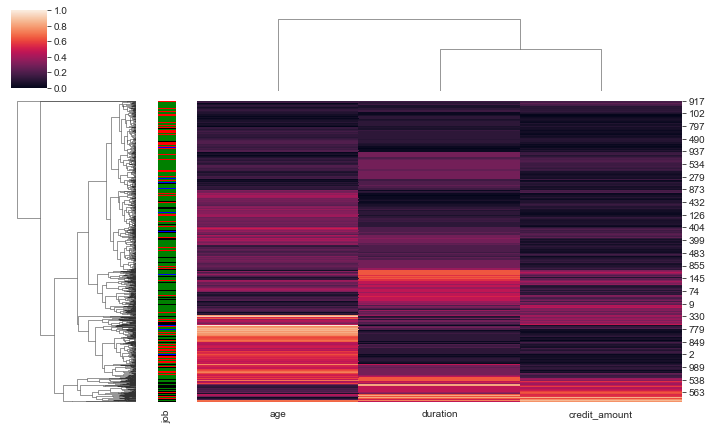

In [84]:
plt.figure(figsize=(4, 4))
sns.clustermap(data=data_1, figsize=(10, 6), standard_scale=1, row_colors=job_colors)
plt.show()

<Figure size 288x288 with 0 Axes>

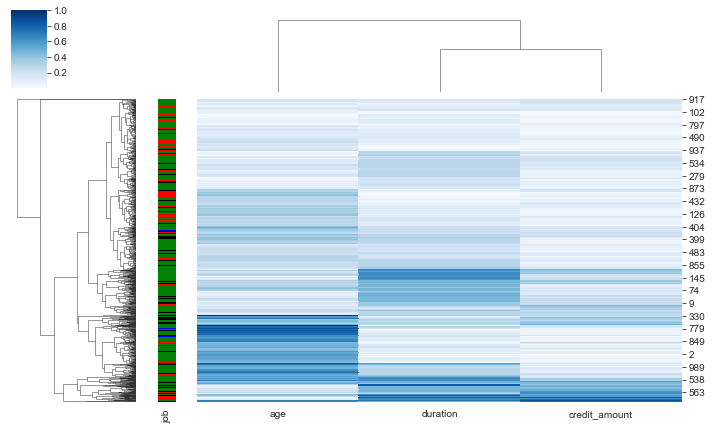

In [85]:
plt.figure(figsize=(4, 4))
sns.clustermap(data=data_1, figsize=(10, 6), standard_scale=1, row_colors=job_colors, cmap='Blues', vmin=0.001)
plt.show()

## catplot <a class="anchor" id=catplot></a>

Не даёт ничего нового, но обеспечивает досутп к разным графикам распределения величин. Параметр kind выбирает базовую функцию уровня осей для использования. Возможность задавать фасеты не отличается от FacetGrid.

https://seaborn.pydata.org/generated/seaborn.catplot.html

<Figure size 1440x432 with 0 Axes>

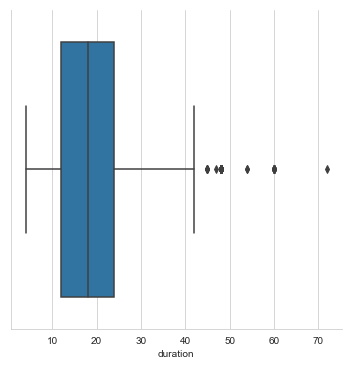

In [86]:
plt.figure(figsize=(20, 6))
sns.catplot(x='duration', data=data, kind='box')
plt.show()

<Figure size 1440x432 with 0 Axes>

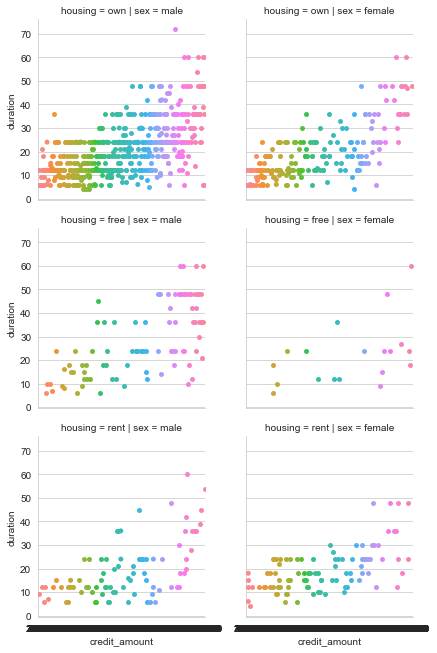

In [87]:
plt.figure(figsize=(20, 6))
sns.catplot(x='credit_amount', y='duration', data=data, kind='strip', col='sex', row='housing', height=3, aspect=1)
plt.show()

## relplot <a class="anchor" id=relplot></a>

Ничего нового. Взаимное рспределение 2-ух величин с множеством делений: hue, row, copl, style, size.

https://seaborn.pydata.org/generated/seaborn.relplot.html

<Figure size 1440x432 with 0 Axes>

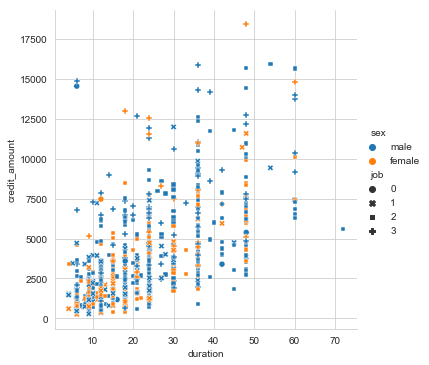

In [88]:
plt.figure(figsize=(20, 6))
sns.relplot(x='duration', y='credit_amount', data=data, hue='sex', style='job')
plt.show()

<Figure size 1440x432 with 0 Axes>

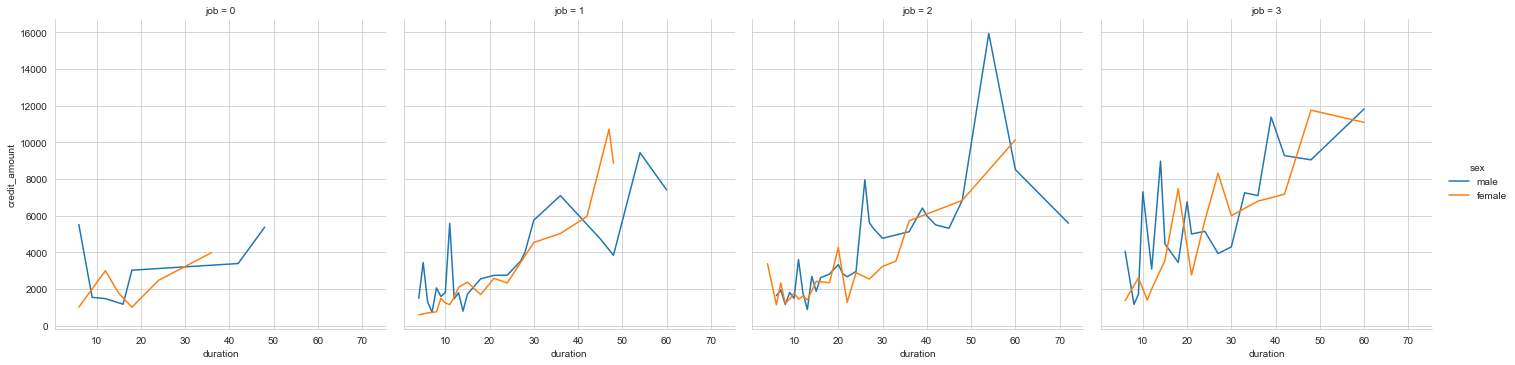

In [89]:
plt.figure(figsize=(20, 6))
sns.relplot(x='duration', y='credit_amount', data=data, hue='sex', kind='line', ci=None, col='job')
plt.show()

## lmplot <a class="anchor" id=lmplot></a>

Строит линейные регрессии. Фишка, как и у cat, dis, в возможности учитывать параметры.

https://seaborn.pydata.org/generated/seaborn.lmplot.html

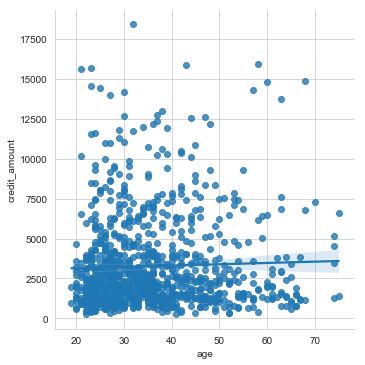

In [90]:
sns.lmplot(x='age', y='credit_amount', data=data);

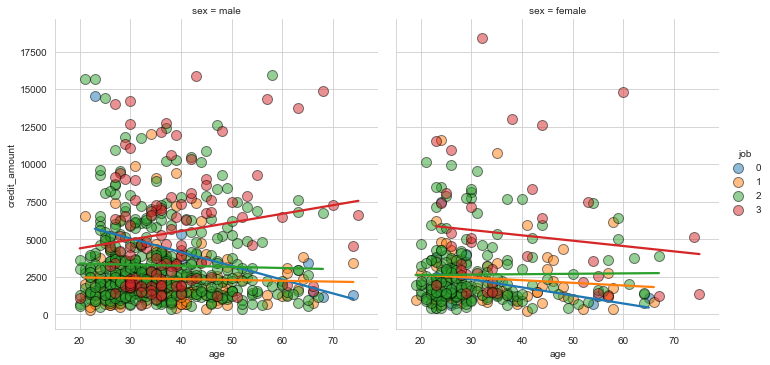

In [91]:
sns.lmplot(x='age', y='credit_amount', data=data, hue='job',
           ci=None, col='sex', scatter_kws={'alpha': 0.5, 's': 100, 'edgecolor': 'black'});

# Динамика <a class="anchor" id=Динамика></a>

## lineplot <a class="anchor" id=lineplot></a>

График, показывает bootstrap.

https://seaborn.pydata.org/generated/seaborn.lineplot.html

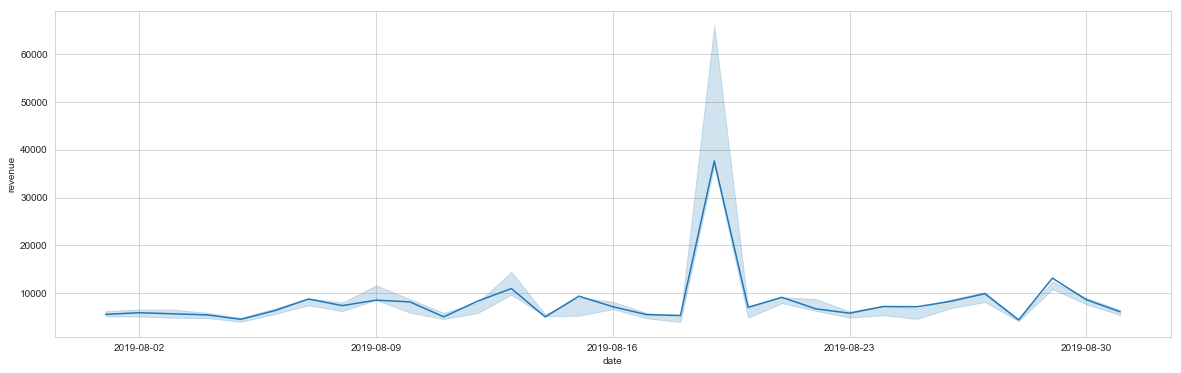

In [92]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='date', y='revenue', data=orders, n_boot=10, ci=50)
plt.show()

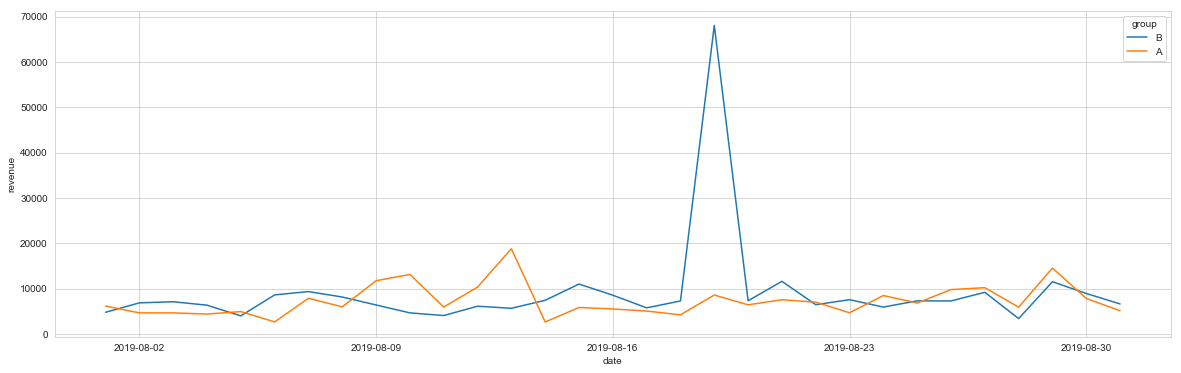

In [93]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='date', y='revenue', data=orders, n_boot=10, ci=None, hue='group')
plt.show()

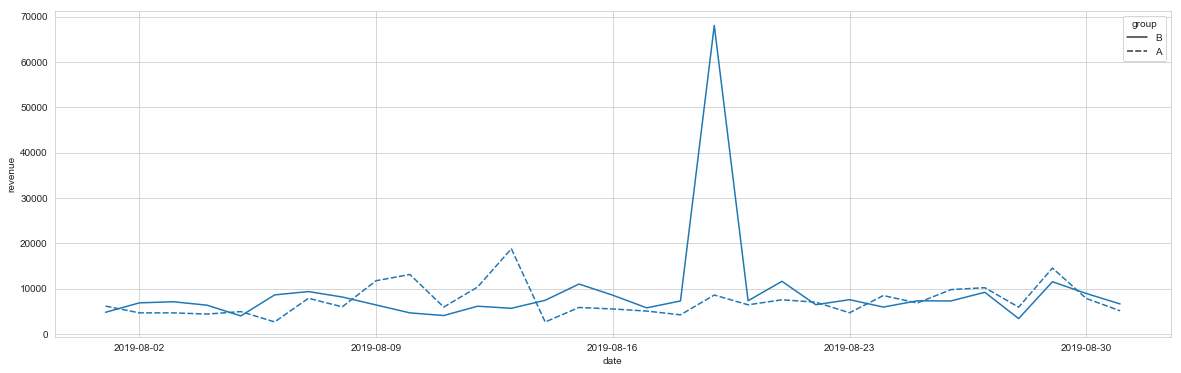

In [94]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='date', y='revenue', data=orders, n_boot=10, ci=None, style='group')
plt.show()

# Несколько графиков <a class="anchor" id=Несколько_графиков></a>

## FacetGrid <a class="anchor" id=FacetGrid></a>

Создали сетку (facets) -- наполнили её графиками.

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

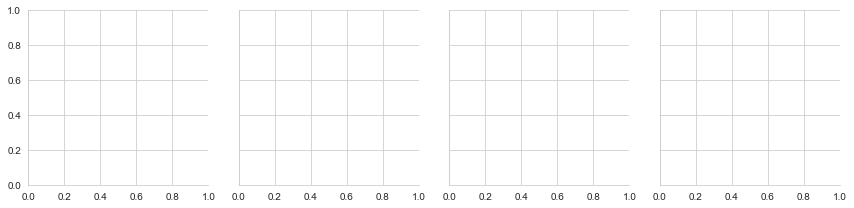

In [95]:
grids = sns.FacetGrid(data, col='job')
#grids.map_dataframe(sns.histplot, y='flipper_length_mm'); 

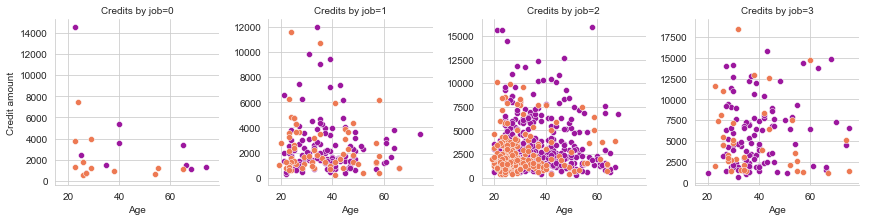

In [96]:
grids = sns.FacetGrid(data, col='job', sharey=False, hue='sex', palette='plasma')
grids.map_dataframe(sns.scatterplot, x='age', y='credit_amount')
grids.set_axis_labels('Age', 'Credit amount')
grids.set_titles(col_template='Credits by job={col_name}')
plt.show()

## PairGrid <a class="anchor" id=PairGrid></a>

Pairplot на максималках. Может не только hist+scatter, но иные сочетания. Обзор всего и вся.

https://seaborn.pydata.org/generated/seaborn.PairGrid.html

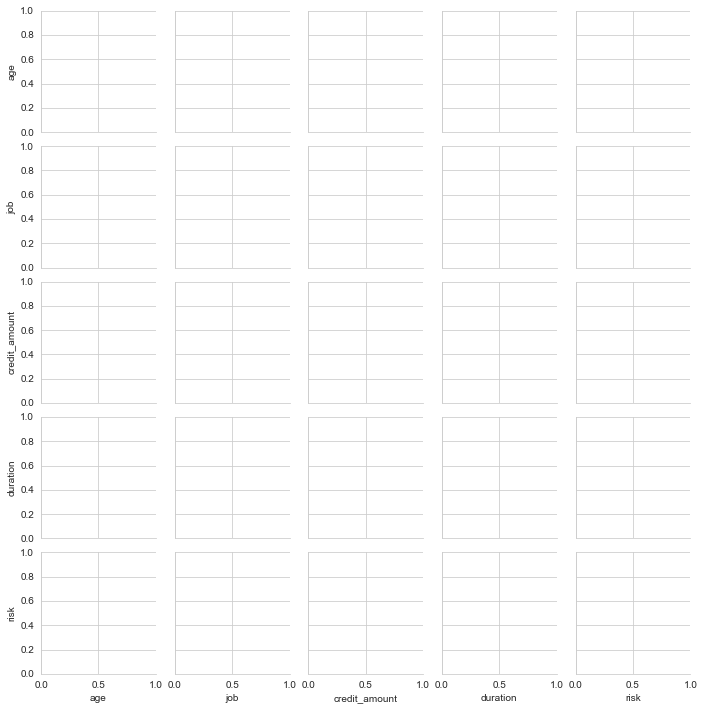

In [97]:
grids = sns.PairGrid(data, height=2)

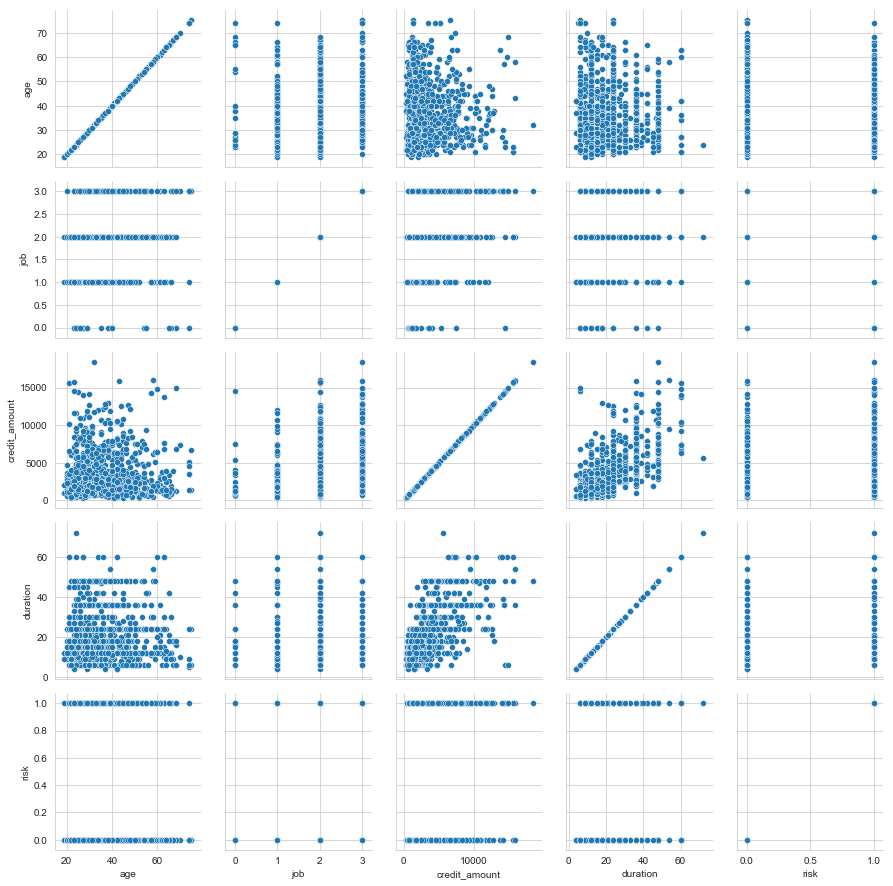

In [98]:
grids = sns.PairGrid(data)
grids.map(sns.scatterplot);

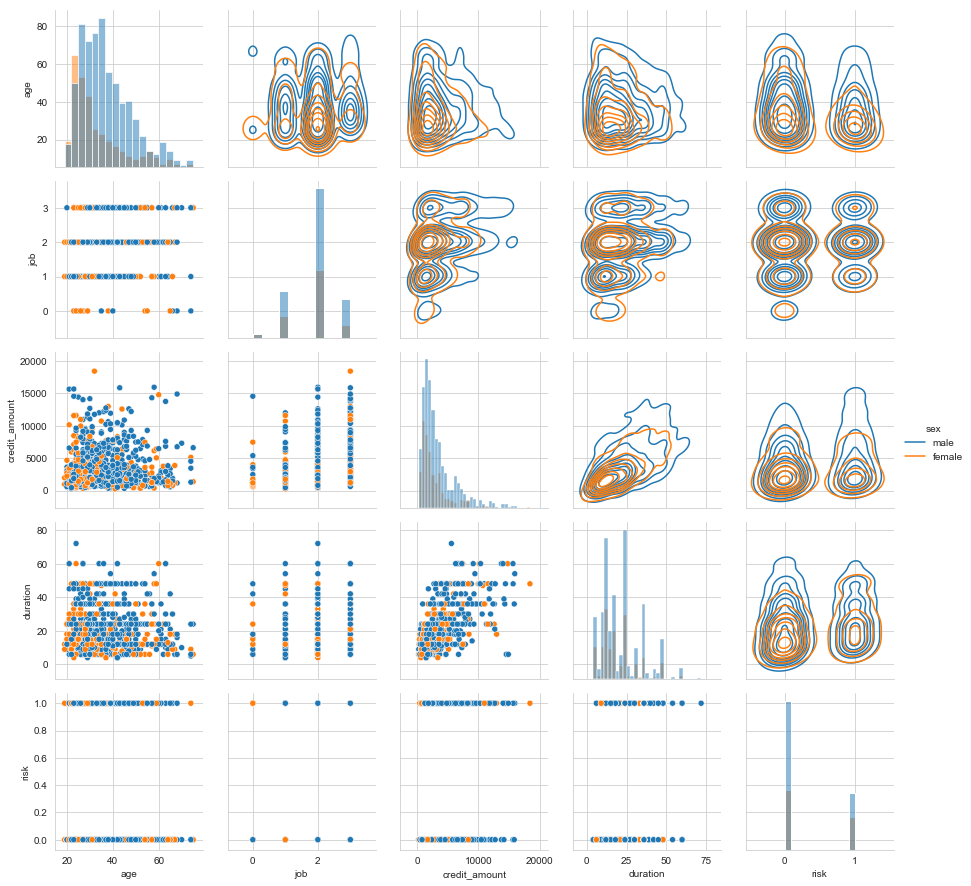

In [99]:
grids = sns.PairGrid(data, hue='sex', diag_sharey=False)
grids.map_lower(sns.scatterplot)
grids.map_diag(sns.histplot)
grids.map_upper(sns.kdeplot)
grids.add_legend();

## JointGrid <a class="anchor" id=JointGrid></a>

Jointplot на максималках. Может не только hist+scatter, но иные сочетания.

https://seaborn.pydata.org/generated/seaborn.JointGrid.html

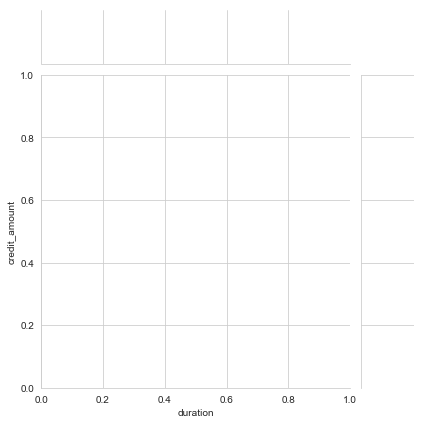

In [100]:
grid = sns.JointGrid(data=data, x='duration', y='credit_amount');

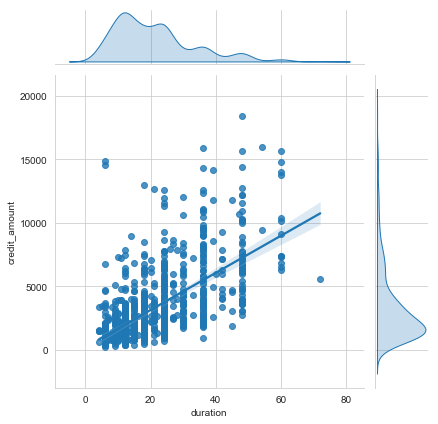

In [101]:
grid = sns.JointGrid(data=data, x='duration', y='credit_amount');
grid.plot_joint(sns.regplot)
grid.plot_marginals(sns.kdeplot, fill=True);

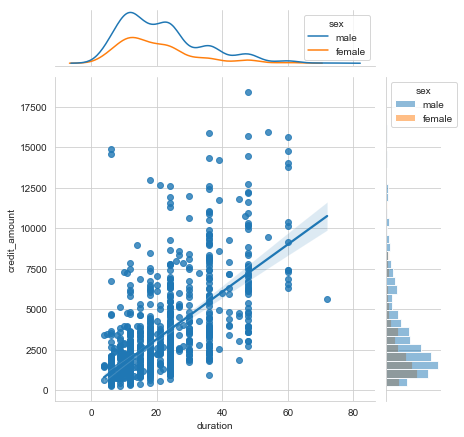

In [102]:
grid = sns.JointGrid()
sns.regplot(x=data['duration'], y=data['credit_amount'], ax=grid.ax_joint)
sns.kdeplot(x=data['duration'], ax=grid.ax_marg_x, hue=data['sex'])  
sns.histplot(y=data['credit_amount'], ax=grid.ax_marg_y, hue=data['sex']);